In [3]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['pdf.fonttype']=42
plt.rcParams['font.sans-serif']='Arial'
%config InlineBackend.figure_format = 'retina'

In [4]:
def norm(data,method): 
    if method=="DESeq":
        data=np.log2(data/(data.T/data.apply(gmean,axis=1)).dropna(axis=1,how='any').apply(np.median,axis=1)+1)
    
    if method=="Seurat_norm":
        data=np.log(data/data.apply(lambda x:x.sum())*10000+1)
    if method=="qnorm":
        rank_mean = data.stack().groupby(data.rank(method='first').stack().astype(int)).mean()
        data=np.log2(data.rank(method='min').stack().astype(int).map(rank_mean).unstack()+1)

    return data


# Human Mouse comparasion

In [5]:
human_data=pd.read_table('../human_mouse/Human_24_t_data_allgene.txt',index_col=0)
human_data

,4861STDY7462257-ACTGAACTCGCACTCT,4861STDY7462257-ACTTTCACAGTCGATT,4861STDY7462257-AGGCCGTGTTCGGCAC,4861STDY7462257-ATCCACCAGATGTAAC,4861STDY7462257-ATTTCTGTCGCAAGCC,4861STDY7462257-CAAGAAAAGACTCGGA,4861STDY7462257-CAAGGCCCAATCACAC,4861STDY7462257-CACAAACAGAGCCTAG,4861STDY7462257-CAGCCGAAGACCTTTG,4861STDY7462257-CATATTCAGAAGGCCT,...,4861STDY7528592-TGTGGTAGTCATATGC,4861STDY7528592-TGTGTTTAGGACCACA,4861STDY7528592-TTAACTCCACCGGAAA,4861STDY7528592-TTAGGCACACGTTGGC,4861STDY7528592-TTAGTTCAGATGAGAG,4861STDY7528592-TTCCCAGAGCGTTTAC,4861STDY7528592-TTCGGTCAGTACGTAA,4861STDY7528592-TTGCGTCGTAAATGTG,4861STDY7528592-TTTGGTTGTGCTCTTC,4861STDY7528592-TTTGGTTTCAGTTAGC
index,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
DPM1,0.000000,2.668812,4.065434,0.000000,2.776347,2.334472,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
SCYL3,0.000000,0.000000,0.000000,0.000000,2.776347,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,2.841535,0.000000
C1orf112,2.368424,0.000000,0.000000,0.000000,2.776347,0.000000,2.618929,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
FGR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.438217,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
CFH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
FUCA2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
GCLC,0.000000,0.000000,3.389296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000


In [6]:
human_data_norm=norm(human_data,'Seurat_norm')
human_data_norm

,4861STDY7462257-ACTGAACTCGCACTCT,4861STDY7462257-ACTTTCACAGTCGATT,4861STDY7462257-AGGCCGTGTTCGGCAC,4861STDY7462257-ATCCACCAGATGTAAC,4861STDY7462257-ATTTCTGTCGCAAGCC,4861STDY7462257-CAAGAAAAGACTCGGA,4861STDY7462257-CAAGGCCCAATCACAC,4861STDY7462257-CACAAACAGAGCCTAG,4861STDY7462257-CAGCCGAAGACCTTTG,4861STDY7462257-CATATTCAGAAGGCCT,...,4861STDY7528592-TGTGGTAGTCATATGC,4861STDY7528592-TGTGTTTAGGACCACA,4861STDY7528592-TTAACTCCACCGGAAA,4861STDY7528592-TTAGGCACACGTTGGC,4861STDY7528592-TTAGTTCAGATGAGAG,4861STDY7528592-TTCCCAGAGCGTTTAC,4861STDY7528592-TTCGGTCAGTACGTAA,4861STDY7528592-TTGCGTCGTAAATGTG,4861STDY7528592-TTTGGTTGTGCTCTTC,4861STDY7528592-TTTGGTTTCAGTTAGC
index,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
DPM1,0.000000,1.536268,2.084151,0.000000,1.534108,1.345278,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
SCYL3,0.000000,0.000000,0.000000,0.000000,1.534108,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.767976,0.000000
C1orf112,1.304578,0.000000,0.000000,0.000000,1.534108,0.000000,1.432226,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
FGR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.378426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
CFH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
FUCA2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
GCLC,0.000000,0.000000,1.926769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [7]:
h2h=pd.read_table('../human_mouse/mouse_human_mapping2.txt',index_col=0)
human_data_norm_homo=human_data_norm.ix[h2h.index]
human_data_norm_homo.dropna(inplace=True)
human_data_norm_homo

,4861STDY7462257-ACTGAACTCGCACTCT,4861STDY7462257-ACTTTCACAGTCGATT,4861STDY7462257-AGGCCGTGTTCGGCAC,4861STDY7462257-ATCCACCAGATGTAAC,4861STDY7462257-ATTTCTGTCGCAAGCC,4861STDY7462257-CAAGAAAAGACTCGGA,4861STDY7462257-CAAGGCCCAATCACAC,4861STDY7462257-CACAAACAGAGCCTAG,4861STDY7462257-CAGCCGAAGACCTTTG,4861STDY7462257-CATATTCAGAAGGCCT,...,4861STDY7528592-TGTGGTAGTCATATGC,4861STDY7528592-TGTGTTTAGGACCACA,4861STDY7528592-TTAACTCCACCGGAAA,4861STDY7528592-TTAGGCACACGTTGGC,4861STDY7528592-TTAGTTCAGATGAGAG,4861STDY7528592-TTCCCAGAGCGTTTAC,4861STDY7528592-TTCGGTCAGTACGTAA,4861STDY7528592-TTGCGTCGTAAATGTG,4861STDY7528592-TTTGGTTGTGCTCTTC,4861STDY7528592-TTTGGTTTCAGTTAGC
index,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SOX17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LYPLA1,1.304578,0.000000,0.000000,0.000000,0.000000,1.345278,0.000000,0.000000,0.000000,0.000000,...,1.807772,0.000000,0.000000,0.0,0.000000,1.802313,0.000000,0.000000,0.000000,0.000000
TCEA1,0.000000,1.805648,2.084151,1.714489,1.534108,1.740221,0.000000,1.742481,1.460280,1.378426,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.182656,2.037286,0.000000
RGS20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATP6V1H,1.304578,1.536268,0.000000,1.451663,0.000000,0.000000,1.432226,0.000000,1.277272,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OPRK1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NPBWR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
human_data_norm_homo['cell']=human_data_norm_homo.index.tolist()
human_data_norm_homo=human_data_norm_homo.groupby('cell').mean()
human_data_norm_homo

,4861STDY7462257-ACTGAACTCGCACTCT,4861STDY7462257-ACTTTCACAGTCGATT,4861STDY7462257-AGGCCGTGTTCGGCAC,4861STDY7462257-ATCCACCAGATGTAAC,4861STDY7462257-ATTTCTGTCGCAAGCC,4861STDY7462257-CAAGAAAAGACTCGGA,4861STDY7462257-CAAGGCCCAATCACAC,4861STDY7462257-CACAAACAGAGCCTAG,4861STDY7462257-CAGCCGAAGACCTTTG,4861STDY7462257-CATATTCAGAAGGCCT,...,4861STDY7528592-TGTGGTAGTCATATGC,4861STDY7528592-TGTGTTTAGGACCACA,4861STDY7528592-TTAACTCCACCGGAAA,4861STDY7528592-TTAGGCACACGTTGGC,4861STDY7528592-TTAGTTCAGATGAGAG,4861STDY7528592-TTCCCAGAGCGTTTAC,4861STDY7528592-TTCGGTCAGTACGTAA,4861STDY7528592-TTGCGTCGTAAATGTG,4861STDY7528592-TTTGGTTGTGCTCTTC,4861STDY7528592-TTTGGTTTCAGTTAGC
cell,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,1.534108,0.000000,1.606752,1.415048,0.000000,1.378426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.767976,2.070696
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.000000,0.000000,0.000000,0.000000,0.000000,1.345278,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AACS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.378426,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.937873,0.000000,0.000000,0.000000
AADAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
mouse_data=pd.read_table('../human_mouse/Mouse_t_data_allgene.txt',index_col=0)
mouse_data

,TACGGTATCAGTTAGC_1,CGTTCTGGTAGAAAGG_1,TGAGAGGGTACGAAAT_1,GCTCCTATCAGAAATG_2,GCGCGATCAGCCTTTC_2,CTAATGGGTGTTTGTG_1,GTCACAAAGATCGATA_1,GTATTCTGTTGTTTGG_1,AGTCTTTTCACCTTAT_2,CAAGGCCGTATATGAG_1,...,ATTGGACGTCATATCG_2,ACGGGTCAGCTAGTCT_1,AACTCTTGTATGAATG_1,CCCAATCCATTAACCG_1,CCAGCGACATCTATGG_1,CCCAGTTCACAAGTAA_1,TTGGAACCATGCGCAC_1,CTGTGCTAGCTTCGCG_2,TGCGCAGGTGCGCTTG_2,GTGGGTCCAGCCTTTC_1
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,1.0,1.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
Lypla1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
Gm37988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
mouse_data_norm=norm(mouse_data,'Seurat_norm')
mouse_data_norm

,TACGGTATCAGTTAGC_1,CGTTCTGGTAGAAAGG_1,TGAGAGGGTACGAAAT_1,GCTCCTATCAGAAATG_2,GCGCGATCAGCCTTTC_2,CTAATGGGTGTTTGTG_1,GTCACAAAGATCGATA_1,GTATTCTGTTGTTTGG_1,AGTCTTTTCACCTTAT_2,CAAGGCCGTATATGAG_1,...,ATTGGACGTCATATCG_2,ACGGGTCAGCTAGTCT_1,AACTCTTGTATGAATG_1,CCCAATCCATTAACCG_1,CCAGCGACATCTATGG_1,CCCAGTTCACAAGTAA_1,TTGGAACCATGCGCAC_1,CTGTGCTAGCTTCGCG_2,TGCGCAGGTGCGCTTG_2,GTGGGTCCAGCCTTTC_1
Xkr4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gm1992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gm37381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Rp1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gm37587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gm37323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Mrpl15,0.850357,1.067978,0.000000,0.888481,1.324322,0.000000,0.991687,0.915991,0.000000,0.000000,...,0.000000,0.0,0.000000,0.901577,1.096616,0.0,0.645806,0.000000,0.000000,0.000000
Lypla1,0.850357,0.000000,0.000000,0.000000,0.000000,0.000000,0.991687,0.000000,1.094628,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.358024,0.908502
Gm37988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [12]:
m2h=pd.read_table('../human_mouse/mouse_human_mapping2.txt',index_col=2)
mouse_data_norm_homo=mouse_data_norm.join(m2h.human_gene,how='inner')
mouse_data_norm_homo.set_index('human_gene',inplace=True)
mouse_data_norm_homo

,TACGGTATCAGTTAGC_1,CGTTCTGGTAGAAAGG_1,TGAGAGGGTACGAAAT_1,GCTCCTATCAGAAATG_2,GCGCGATCAGCCTTTC_2,CTAATGGGTGTTTGTG_1,GTCACAAAGATCGATA_1,GTATTCTGTTGTTTGG_1,AGTCTTTTCACCTTAT_2,CAAGGCCGTATATGAG_1,...,ATTGGACGTCATATCG_2,ACGGGTCAGCTAGTCT_1,AACTCTTGTATGAATG_1,CCCAATCCATTAACCG_1,CCAGCGACATCTATGG_1,CCCAGTTCACAAGTAA_1,TTGGAACCATGCGCAC_1,CTGTGCTAGCTTCGCG_2,TGCGCAGGTGCGCTTG_2,GTGGGTCCAGCCTTTC_1
human_gene,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SOX17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LYPLA1,0.850357,0.000000,0.000000,0.000000,0.000000,0.000000,0.991687,0.000000,1.094628,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.358024,0.908502
TCEA1,0.850357,0.000000,0.000000,0.000000,0.000000,0.000000,0.991687,0.915991,1.094628,0.000000,...,0.799842,0.000000,0.000000,0.901577,0.000000,0.000000,0.645806,0.712493,0.000000,0.908502
RGS20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATP6V1H,0.000000,0.000000,0.000000,0.000000,0.000000,1.449141,0.000000,0.000000,1.094628,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.358024,0.000000
OPRK1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NPBWR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RB1CC1,0.850357,1.067978,0.786195,0.000000,0.652262,0.000000,0.000000,0.000000,1.604655,1.170685,...,0.000000,0.000000,0.000000,0.000000,1.096616,0.000000,1.034979,0.000000,0.893739,0.000000


In [13]:
mouse_data_norm_homo['cell']=mouse_data_norm_homo.index.tolist()
mouse_data_norm_homo=mouse_data_norm_homo.groupby('cell').mean()
mouse_data_norm_homo

,TACGGTATCAGTTAGC_1,CGTTCTGGTAGAAAGG_1,TGAGAGGGTACGAAAT_1,GCTCCTATCAGAAATG_2,GCGCGATCAGCCTTTC_2,CTAATGGGTGTTTGTG_1,GTCACAAAGATCGATA_1,GTATTCTGTTGTTTGG_1,AGTCTTTTCACCTTAT_2,CAAGGCCGTATATGAG_1,...,ATTGGACGTCATATCG_2,ACGGGTCAGCTAGTCT_1,AACTCTTGTATGAATG_1,CCCAATCCATTAACCG_1,CCAGCGACATCTATGG_1,CCCAGTTCACAAGTAA_1,TTGGAACCATGCGCAC_1,CTGTGCTAGCTTCGCG_2,TGCGCAGGTGCGCTTG_2,GTGGGTCCAGCCTTTC_1
cell,,,,,,,,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.000000,1.067978,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AACS,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.799842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADACL2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
human_cluster=pd.read_table('../human_mouse/Human_cluster_t.txt',index_col=0)
human_cluster

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.0.8,seurat_clusters,color,stage,bigstage,PBA_order
cell,,,,,,,,,
4861STDY7462257-ACTGAACTCGCACTCT,y243,8814.853733,3105,12,12,darkcyan,1DN,1DN,0.380232
4861STDY7462257-ACTTTCACAGTCGATT,y243,7317.395980,2358,12,12,darkcyan,1DN,1DN,0.381719
4861STDY7462257-AGGCCGTGTTCGGCAC,y243,5776.601074,1553,12,12,darkcyan,1DN,1DN,0.375846
4861STDY7462257-ATCCACCAGATGTAAC,y243,8194.031205,2625,12,12,darkcyan,1DN,1DN,0.381560
4861STDY7462257-ATTTCTGTCGCAAGCC,y243,7633.225609,2395,12,12,darkcyan,1DN,1DN,0.381817
4861STDY7462257-CAAGAAAAGACTCGGA,y243,8222.138074,2898,12,12,darkcyan,1DN,1DN,0.356892
4861STDY7462257-CAAGGCCCAATCACAC,y243,8212.314489,2696,12,12,darkcyan,1DN,1DN,0.381635
4861STDY7462257-CACAAACAGAGCCTAG,y243,8329.357367,2738,12,12,darkcyan,1DN,1DN,0.382018
4861STDY7462257-CAGCCGAAGACCTTTG,y243,8910.486982,3184,12,12,darkcyan,1DN,1DN,0.381872


In [17]:
human_data_stage_aver=pd.DataFrame(index=human_data_norm_homo.index)
for i in human_cluster.bigstage.unique():
#for i in ['3DPbla']:
      
    a=human_data_norm_homo.T
    
    b=a.ix[human_cluster[human_cluster.bigstage==i].index].T
    human_data_stage_aver[i]=b.mean(axis=1)
human_data_stage_aver

,1DN,2ISP,3DPbla,4DPre,5DPsel,6CD4,7CD8
cell,,,,,,,
A1BG,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT,0.000000,0.000000,0.000301,0.000000,0.001922,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.254112,0.439258,0.372734,0.123618,0.102310,0.136400,0.147961
AACS,0.244661,0.174034,0.181420,0.112009,0.071589,0.046686,0.060648
AADAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
human_data_stage_aver=human_data_stage_aver.rename(columns={'1DN':'Human_DN','2ISP':'Human_ISP','3DPbla':'Human_DPbla',
                                      '4DPre':'Human_DPre','5DPsel':'Human_DPsel',
                                     '6CD4':'Human_CD4','7CD8':'Human_CD8'})
human_data_stage_aver

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8
cell,,,,,,,
A1BG,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT,0.000000,0.000000,0.000301,0.000000,0.001922,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.254112,0.439258,0.372734,0.123618,0.102310,0.136400,0.147961
AACS,0.244661,0.174034,0.181420,0.112009,0.071589,0.046686,0.060648
AADAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
mouse_cluster=pd.read_table('../human_mouse/Mouse_cluster_t.txt',index_col=0)
mouse_cluster

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,stim,integrated_snn_res.0.8,seurat_clusters,RNA_snn_res.1,stage,bigstage,color,PBA_order
TACGGTATCAGTTAGC_1,Self,7457,2156,3.728041,Self,10,12,12,1DN,1DN,darkcyan,0.211898
CGTTCTGGTAGAAAGG_1,Self,5236,1991,3.781513,Self,10,12,12,1DN,1DN,darkcyan,0.239283
TGAGAGGGTACGAAAT_1,Self,8365,2529,3.371189,Self,10,12,12,1DN,1DN,darkcyan,0.218463
GCTCCTATCAGAAATG_2,Tabula,6983,2507,2.420163,Tabula,10,12,12,1DN,1DN,darkcyan,0.227197
GCGCGATCAGCCTTTC_2,Tabula,10869,3112,2.474929,Tabula,10,12,12,1DN,1DN,darkcyan,0.251930
CTAATGGGTGTTTGTG_1,Self,3064,1447,4.471279,Self,10,12,12,1DN,1DN,darkcyan,0.231457
GTCACAAAGATCGATA_1,Self,5895,1974,4.715861,Self,10,12,12,1DN,1DN,darkcyan,0.225259
GTATTCTGTTGTTTGG_1,Self,6670,2278,3.403298,Self,10,12,12,1DN,1DN,darkcyan,0.190384
AGTCTTTTCACCTTAT_2,Tabula,5026,2130,2.467171,Tabula,10,12,12,1DN,1DN,darkcyan,0.229078
CAAGGCCGTATATGAG_1,Self,4494,1800,3.471295,Self,10,12,12,1DN,1DN,darkcyan,0.221837


In [20]:
mouse_data_stage_aver=pd.DataFrame(index=mouse_data_norm_homo.index)
for i in mouse_cluster.bigstage.unique():
#for i in ['3DPbla']:
      
    a=mouse_data_norm_homo.T
    
    b=a.ix[mouse_cluster[mouse_cluster.bigstage==i].index].T
    mouse_data_stage_aver[i]=b.mean(axis=1)
mouse_data_stage_aver

,1DN,2ISP,3DPbla,4DPre,5DPsel,6CD4,7CD8
cell,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.004260,0.004959
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.065580,0.190482,0.186491,0.062401,0.047429,0.056477,0.089818
AACS,0.050250,0.057254,0.057970,0.040866,0.051784,0.019380,0.053222
AADAC,0.000000,0.000000,0.001185,0.000000,0.000000,0.000000,0.000000
AADACL2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
mouse_data_stage_aver=mouse_data_stage_aver.rename(columns={'1DN':'Mouse_DN','2ISP':'Mouse_ISP','3DPbla':'Mouse_DPbla',
                                      '4DPre':'Mouse_DPre','5DPsel':'Mouse_DPsel',
                                     '6CD4':'Mouse_CD4','7CD8':'Mouse_CD8'})
mouse_data_stage_aver

,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.004260,0.004959
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.065580,0.190482,0.186491,0.062401,0.047429,0.056477,0.089818
AACS,0.050250,0.057254,0.057970,0.040866,0.051784,0.019380,0.053222
AADAC,0.000000,0.000000,0.001185,0.000000,0.000000,0.000000,0.000000
AADACL2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


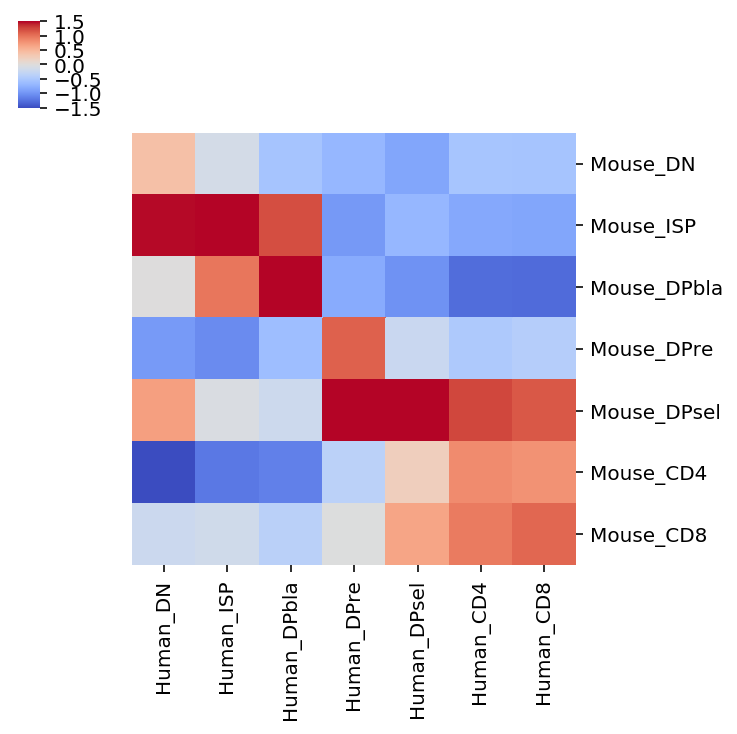

In [22]:
#human mouse stage correlation
merget=human_data_stage_aver.join(mouse_data_stage_aver,how='inner')
cor=[]
for i in range(7):
    for j in range(7,14):
        cor.append(merget.columns[i]+'\t'+merget.columns[j]+'\t'+
                   str(np.corrcoef(merget.iloc[:,i],merget.iloc[:,j])[0][1])+'\n')
        
d={}
import collections
d = collections.defaultdict(dict)
for line in cor:
    item=line.split('\t')
    if float(item[2])>0.01:
        d[item[0]][item[1]]=float(item[2])
cdata=pd.DataFrame(d)
cdata=cdata[['Human_DN','Human_ISP','Human_DPbla','Human_DPre','Human_DPsel',
                            'Human_CD4','Human_CD8']]
cdata=cdata.ix[['Mouse_DN','Mouse_ISP','Mouse_DPbla',
                            'Mouse_DPre','Mouse_DPsel',
                            'Mouse_CD4','Mouse_CD8']]
sns.clustermap(cdata,col_cluster=False,row_cluster=False,metric='correlation',
               cmap='coolwarm',figsize=(5,5),z_score=1,vmax=1.5,vmin=-1.5,
            yticklabels=True,xticklabels=True)

#plt.savefig('../human_mouse/difference/human_mouse_person_correlation_zscore.pdf',bbox_inches='tight')

plt.show()

# Cross-species comparative analysis

In [23]:
#Drop out

In [15]:
human_gene_count=human_data_norm_homo[human_data_norm_homo>0].count(axis=1)

mouse_gene_count=mouse_data_norm_homo[mouse_data_norm_homo>0].count(axis=1)

human_gene_f=human_gene_count[human_gene_count<3]
mouse_gene_f=mouse_gene_count[mouse_gene_count<3]
overlap_f=[i for i in human_gene_f.index.tolist() if i in mouse_gene_f.index.tolist()]
human_gene_f_unique=human_gene_f.drop(overlap_f)
mouse_gene_f_unique=mouse_gene_f.drop(overlap_f)


In [24]:
human_gene_f_unique_data=human_data_stage_aver.ix[human_gene_f_unique.index]
mouse_gene_f_unique_data=mouse_data_stage_aver.ix[mouse_gene_f_unique.index]
human_gene_f_unique_data

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8
cell,,,,,,,
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADACL4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001074
ABCB11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCB4,0.000000,0.000000,0.000000,0.000000,0.000000,0.001400,0.000772
ACADL,0.000000,0.000000,0.000000,0.000335,0.000000,0.000000,0.000000
ACCSL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACOX2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACPP,0.000000,0.000000,0.000265,0.000000,0.000000,0.000000,0.000000


In [25]:
human_gene_f_unique_data_mouse=mouse_data_stage_aver.ix[human_gene_f_unique.index]
human_gene_f_unique_data_mouse.dropna(inplace=True)
human_gene_f_unique_data_mouse

,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,
ABCA3,0.009792,0.032901,0.046881,0.050293,0.050806,0.044843,0.057144
ABCB11,0.000000,0.000000,0.000000,0.000000,0.000000,0.002578,0.007705
ABCB4,0.023112,0.000000,0.003758,0.023979,0.006237,0.000000,0.000000
ACADL,0.445402,0.395507,0.360419,0.230792,0.122873,0.131846,0.178053
ACOX2,0.005148,0.001458,0.000000,0.000000,0.000000,0.003816,0.000000
ACPP,0.009167,0.003115,0.002058,0.017057,0.015140,0.006047,0.033719
ACSBG2,0.000000,0.006859,0.000000,0.003789,0.004709,0.000000,0.004983
ACTN3,0.000000,0.001243,0.001910,0.000000,0.000000,0.003359,0.000000
ADAMTS14,0.000000,0.000000,0.000533,0.000000,0.000000,0.005574,0.000000


In [26]:
human_gene_f_unique_data_mouse=mouse_data_norm_homo.ix[human_gene_f_unique.index]
human_gene_f_unique_data_mouse.dropna(inplace=True)
human_gene_f_unique_data_mouse_count=human_gene_f_unique_data_mouse[human_gene_f_unique_data_mouse>0].count(axis=1)
human_gene_f_unique_data_mouse=human_gene_f_unique_data_mouse[human_gene_f_unique_data_mouse_count>20]
human_gene_f_unique_data_mouse=mouse_data_stage_aver.ix[human_gene_f_unique_data_mouse.index]
human_gene_f_unique_data_mouse


,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,
ABCA3,0.009792,0.032901,0.046881,0.050293,0.050806,0.044843,0.057144
ABCB4,0.023112,0.000000,0.003758,0.023979,0.006237,0.000000,0.000000
ACADL,0.445402,0.395507,0.360419,0.230792,0.122873,0.131846,0.178053
ACPP,0.009167,0.003115,0.002058,0.017057,0.015140,0.006047,0.033719
AFP,0.006333,0.003553,0.005210,0.001779,0.028758,0.019629,0.036809
AGRP,0.010234,0.009928,0.007252,0.008608,0.009881,0.000000,0.008723
ALDH1A3,0.016349,0.014105,0.009749,0.004594,0.000000,0.009274,0.006648
AMPD1,0.008102,0.010814,0.042467,0.076607,0.044941,0.061659,0.111296
APOA2,0.000000,0.004322,0.010792,0.018540,0.003088,0.007249,0.009878


In [27]:
merge_human_dropout=human_gene_f_unique_data.join(human_gene_f_unique_data_mouse,how='inner')
merge_human_dropout

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
ABCA3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001074,0.009792,0.032901,0.046881,0.050293,0.050806,0.044843,0.057144
ABCB4,0.000000,0.000000,0.000000,0.000000,0.000000,0.001400,0.000772,0.023112,0.000000,0.003758,0.023979,0.006237,0.000000,0.000000
ACADL,0.000000,0.000000,0.000000,0.000335,0.000000,0.000000,0.000000,0.445402,0.395507,0.360419,0.230792,0.122873,0.131846,0.178053
ACPP,0.000000,0.000000,0.000265,0.000000,0.000000,0.000000,0.000000,0.009167,0.003115,0.002058,0.017057,0.015140,0.006047,0.033719
AFP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006333,0.003553,0.005210,0.001779,0.028758,0.019629,0.036809
AGRP,0.000000,0.000000,0.000226,0.000000,0.000000,0.000000,0.000856,0.010234,0.009928,0.007252,0.008608,0.009881,0.000000,0.008723
ALDH1A3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000915,0.016349,0.014105,0.009749,0.004594,0.000000,0.009274,0.006648
AMPD1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008102,0.010814,0.042467,0.076607,0.044941,0.061659,0.111296
APOA2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004322,0.010792,0.018540,0.003088,0.007249,0.009878


In [28]:

mouse_gene_f_unique_data_human=human_data_norm_homo.ix[mouse_gene_f_unique.index]
mouse_gene_f_unique_data_human_count=mouse_gene_f_unique_data_human[mouse_gene_f_unique_data_human>0].count(axis=1)
mouse_gene_f_unique_data_human=mouse_gene_f_unique_data_human[mouse_gene_f_unique_data_human_count>20]

#mouse_gene_f_unique_data_human=human_data_stage_aver.ix[mouse_gene_f_unique.index]
mouse_gene_f_unique_data_human=human_data_stage_aver.ix[mouse_gene_f_unique_data_human.index]
mouse_gene_f_unique_data_human.dropna(inplace=True)
merge_mouse_dropout=mouse_gene_f_unique_data.join(mouse_gene_f_unique_data_human,how='inner')
merge_mouse_dropout

,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8
cell,,,,,,,,,,,,,,
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328
AADAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015922,0.050065,0.032122,0.005208,0.000000,0.000000,0.000000
AASS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034315,0.047676,0.042527,0.022127,0.015903,0.004802,0.004570
ABCA5,0.000000,0.000000,0.000000,0.000000,0.000000,0.004189,0.000000,0.094154,0.047669,0.081616,0.058775,0.059272,0.067653,0.070757
ABCA6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008930,0.004468,0.003947,0.003422,0.007133,0.001259,0.000921
ABCA8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005150,0.002564,0.002756,0.003513,0.001572,0.001444,0.003140
ABCC2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001916,0.003866,0.003419,0.004740,0.001266,0.001732,0.000959
ABCC8,0.000000,0.001418,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.019803,0.000613,0.000000,0.000000,0.000000,0.000000


In [29]:
merge_dropout=pd.concat([merge_mouse_dropout,merge_human_dropout])
merge_dropout=merge_dropout[['Human_DN','Human_ISP','Human_DPbla','Human_DPre','Human_DPsel',
                            'Human_CD4','Human_CD8','Mouse_DN','Mouse_ISP','Mouse_DPbla',
                            'Mouse_DPre','Mouse_DPsel',
                            'Mouse_CD4','Mouse_CD8']]
merge_dropout

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
A1BG,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADAT,0.015922,0.050065,0.032122,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AASS,0.034315,0.047676,0.042527,0.022127,0.015903,0.004802,0.004570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA5,0.094154,0.047669,0.081616,0.058775,0.059272,0.067653,0.070757,0.000000,0.000000,0.000000,0.000000,0.000000,0.004189,0.000000
ABCA6,0.008930,0.004468,0.003947,0.003422,0.007133,0.001259,0.000921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA8,0.005150,0.002564,0.002756,0.003513,0.001572,0.001444,0.003140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC2,0.001916,0.003866,0.003419,0.004740,0.001266,0.001732,0.000959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC8,0.030534,0.019803,0.000613,0.000000,0.000000,0.000000,0.000000,0.000000,0.001418,0.000000,0.000000,0.000000,0.000000,0.000000


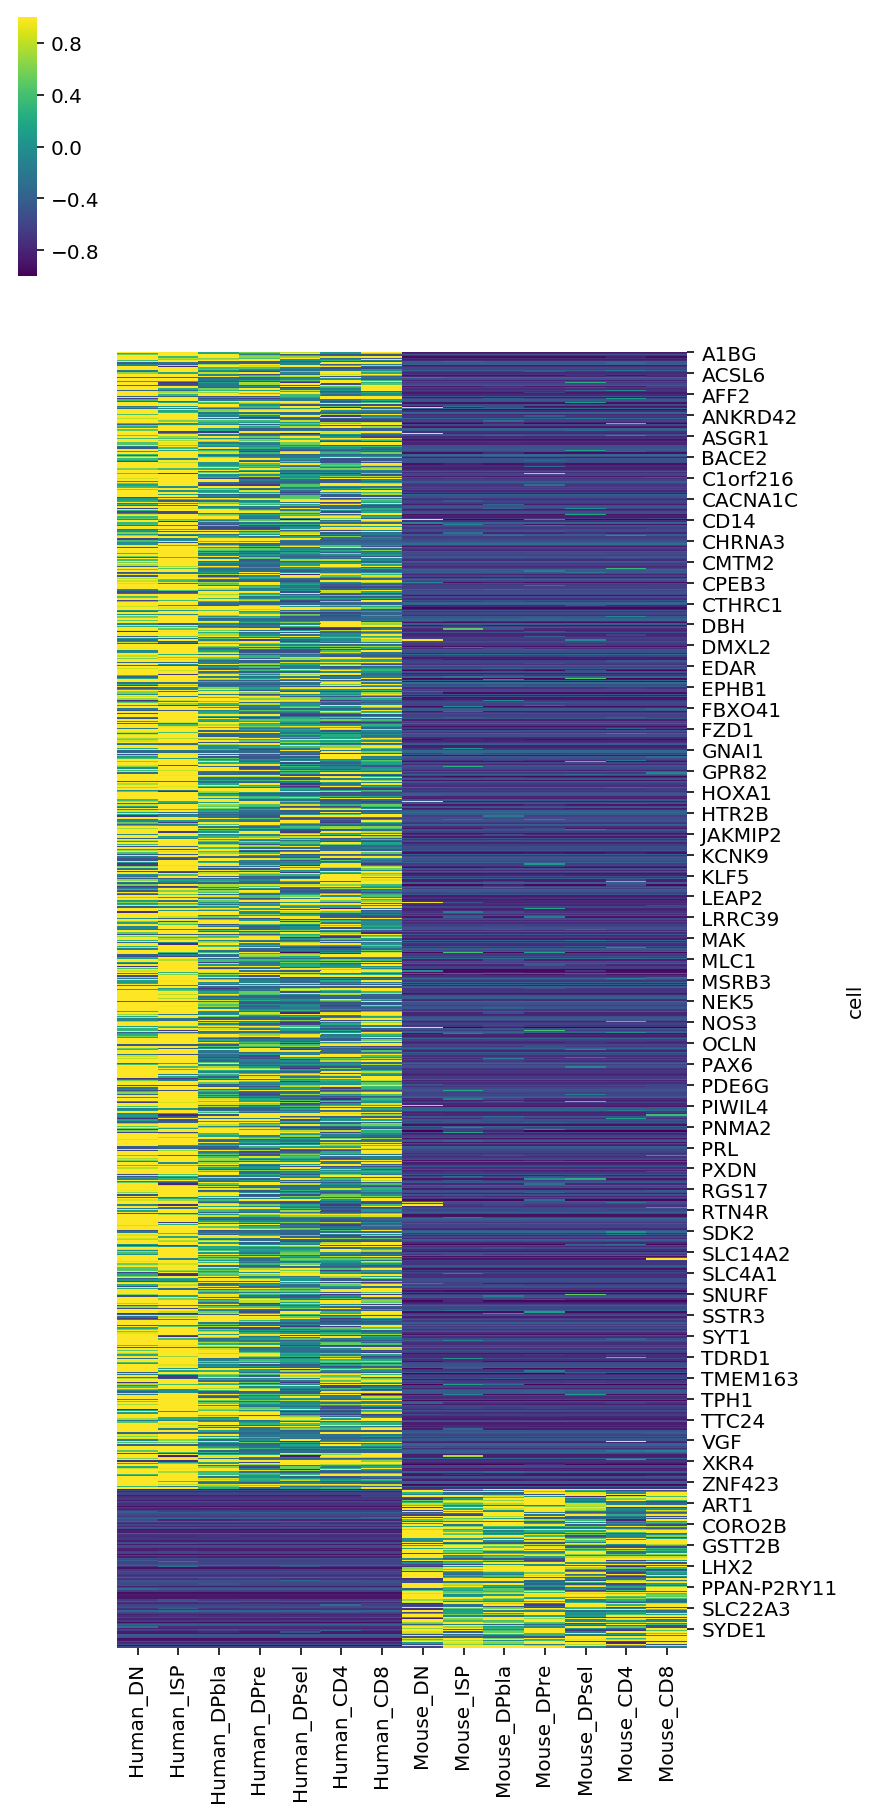

In [30]:
sns.clustermap(merge_dropout,row_cluster=False,col_cluster=False,
               cmap='viridis',z_score=0,vmax=1,vmin=-1,figsize=(6,15))
#plt.savefig('../human_mouse/difference/human_mouse_dropout_20.pdf',bbox_inches='tight')
plt.show()

In [31]:
#stage different genes

In [33]:
human_cluster.sort_values(['stage','PBA_order'],inplace=True)
human_data_norm_homo_order=human_data_norm_homo.T.ix[human_cluster.index].T

mouse_cluster.sort_values(['stage','PBA_order'],inplace=True)
mouse_data_norm_homo_order=mouse_data_norm_homo.T.ix[mouse_cluster.index].T


In [34]:
human_data_norm_homo_order_f=human_data_norm_homo_order.drop(human_gene_f.index)
human_data_norm_homo_order_f

cell,4861STDY7528590-GCTGCGACAGGCTCAC,4861STDY7462264-TCCCGATGTCAAACTC,4861STDY7528591-CTACCCACATTGGGCC,4861STDY7462262-GTTACAGAGTACACCT,4861STDY7462262-TGCCAAAAGGCCATAG,4861STDY7462258-AAGGTTCCAGGATTGG,4861STDY7528587-TATTACCTCTTGTACT,4861STDY7462258-TACAGTGCATGCCTTC,4861STDY7462263-CACATTTCAACACCTA,4861STDY7528589-CTAAGACAGGGTATCG,...,4861STDY7462257-ACGCCGATCTCACATT,4861STDY7528588-CTGTGCTGTACGACCC,4861STDY7462261-GGCCGATAGAGAGCTC,4861STDY7528592-CGAGAAGAGATGTAAC,4861STDY7528592-GTTAAGCAGCGGATCA,4861STDY7528591-GGCCGATTCGTATCAG,4861STDY7528591-ACATGGTGTGTCAATC,4861STDY7462262-CACACCTCACAGAGGT,4861STDY7462260-GCAGTTAAGAATAGGG,4861STDY7462257-AGCAGCCGTCCGTCAG
cell,,,,,,,,,,,,,,,,,,,,,
A1BG,1.259392,0.000000,0.000000,0.000000,0.000000,0.000000,1.436334,0.000000,1.584053,1.368225,...,0.000000,1.899208,2.081781,1.640786,1.773971,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.126252,0.000000,0.000000,0.000000,0.000000,1.800199,0.000000,0.000000,0.000000,0.000000
AACS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAK1,1.436769,1.830158,1.195764,1.514231,1.569233,0.000000,0.000000,1.685871,0.000000,0.000000,...,2.126252,1.899208,1.808298,0.000000,0.000000,2.119213,0.000000,1.971644,0.000000,2.373285
AAMP,1.259392,0.000000,0.000000,1.688309,0.000000,1.362247,1.161099,1.421908,0.000000,0.000000,...,0.000000,0.000000,1.808298,1.640786,0.000000,0.000000,0.000000,0.000000,1.960982,0.000000
AANAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AARS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.723270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
mouse_data_norm_homo_order_f=mouse_data_norm_homo_order.drop(mouse_gene_f.index)
mouse_data_norm_homo_order_f

,CATATTCTCGTCCGTT_1,TCAGCTCGTCATGCCG_1,GCATGTATCCTTCAAT_1,ACATCAGCACCATGTA_1,GTATTCTGTTGTTTGG_1,CAAGATCTCTTCCTTC_1,TACGGTATCAGTTAGC_1,GGACATTCAAACCTAC_1,AACACGTGTCCTGCTT_1,ATTGGTGCATCGGAAG_1,...,CGTGAGCGTTTCCACC_1,TGACTTTTCTGACCTC_2,TTCTCCTCACACCGAC_1,AGGGATGAGCTGATAA_1,GTCACGGCAAAGGCGT_2,CCTTTCTTCACGCGGT_1,ACTGAGTCATCGGGTC_2,GACGTTAAGGCTATCT_1,GAAGCAGGTCTAGTCA_2,TCTCATAAGATCACGG_1
cell,,,,,,,,,,,,,,,,,,,,,
AAAS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.979269,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.285109
AACS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.285109
AAK1,0.000000,0.786977,0.872771,0.000000,0.915991,0.000000,0.000000,0.000000,0.000000,0.834552,...,0.000000,0.000000,0.000000,1.150222,0.000000,1.207038,0.0,0.000000,0.000000,0.000000
AAMP,0.000000,0.000000,0.872771,0.598509,1.704339,0.993825,0.850357,1.229167,0.000000,0.000000,...,0.000000,1.050742,0.000000,0.000000,0.926737,0.000000,0.0,0.000000,0.000000,0.000000
AARS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.150222,0.000000,0.000000,0.0,0.000000,1.213649,0.000000
AARS2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
AARSD1,0.000000,0.000000,0.872771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.207038,0.0,0.000000,0.000000,0.000000
AASDHPPT,0.000000,0.000000,0.872771,0.000000,0.000000,0.000000,0.000000,0.000000,0.924346,1.283032,...,0.000000,0.000000,0.000000,0.000000,0.926737,0.000000,0.0,1.037972,0.000000,0.000000
AATF,0.000000,0.000000,0.000000,0.000000,0.915991,0.000000,0.000000,0.000000,0.000000,0.834552,...,0.000000,1.050742,0.000000,1.150222,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [36]:
overlap_gene=[i for i in human_data_norm_homo_order_f.index.tolist() if i in mouse_data_norm_homo_order_f.index.tolist()]
overlap_gene

['AAAS',
 'AACS',
 'AAK1',
 'AAMP',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDHPPT',
 'AATF',
 'ABAT',
 'ABCA1',
 'ABCA2',
 'ABCA7',
 'ABCB1',
 'ABCB10',
 'ABCB6',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCD1',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD13',
 'ABHD14A',
 'ABHD14B',
 'ABHD2',
 'ABHD4',
 'ABHD5',
 'ABHD6',
 'ABHD8',
 'ABI1',
 'ABI2',
 'ABI3',
 'ABL1',
 'ABL2',
 'ABLIM1',
 'ABLIM2',
 'ABR',
 'ABT1',
 'ABTB1',
 'ABTB2',
 'ACAA1',
 'ACAA2',
 'ACACA',
 'ACACB',
 'ACAD10',
 'ACAD11',
 'ACAD8',
 'ACAD9',
 'ACADM',
 'ACADS',
 'ACADSB',
 'ACADVL',
 'ACAN',
 'ACAT1',
 'ACAT2',
 'ACBD3',
 'ACBD4',
 'ACBD5',
 'ACBD6',
 'ACBD7',
 'ACD',
 'ACHE',
 'ACIN1',
 'ACLY',
 'ACO1',
 'ACO2',
 'ACOT2',
 'ACOT7',
 'ACOT8',
 'ACOX1',
 'ACOX3',
 'ACOXL',
 'ACP1',
 'ACP2',
 'ACP5',
 'ACP6',
 'ACRBP',
 'ACSBG1',
 'ACSL1',
 'ACSL3',
 'ACSL4',
 'ACSL5',
 'ACSS1',
 'ACSS2',
 'ACTB',
 'ACTG1',
 'ACTG

In [37]:
human_data_norm_homo_order_fo=human_data_norm_homo_order_f.ix[overlap_gene]
mouse_data_norm_homo_order_fo=mouse_data_norm_homo_order_f.ix[overlap_gene]
mouse_data_norm_homo_order_fo.drop_duplicates(inplace=True)
human_data_norm_homo_order_fo.drop_duplicates(inplace=True)
human_data_norm_homo_order_fo['cell']=human_data_norm_homo_order_fo.index.tolist()
human_data_norm_homo_order_fo=human_data_norm_homo_order_fo.groupby('cell').mean()
print mouse_data_norm_homo_order_fo.shape,human_data_norm_homo_order_fo.shape

(8591, 3185) (8591, 14977)


In [38]:
from scipy import stats
def p_adjust_bh(p):
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]

In [39]:
merge_stage_aver=human_data_stage_aver.join(mouse_data_stage_aver,how='inner')
merge_stage_aver

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
A1BG,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004260,0.004959
A4GALT,0.000000,0.000000,0.000301,0.000000,0.001922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AAAS,0.254112,0.439258,0.372734,0.123618,0.102310,0.136400,0.147961,0.065580,0.190482,0.186491,0.062401,0.047429,0.056477,0.089818
AACS,0.244661,0.174034,0.181420,0.112009,0.071589,0.046686,0.060648,0.050250,0.057254,0.057970,0.040866,0.051784,0.019380,0.053222
AADAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001185,0.000000,0.000000,0.000000,0.000000
AADACL2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
human_marker=pd.DataFrame()
for st in human_cluster.bigstage.unique():
    cluster_stage=human_cluster[human_cluster.bigstage==st]
    

    data_target=human_data_norm_homo_order_fo.T.ix[cluster_stage.index].T
    test_func=lambda x :np.mean(x)
    background=human_data_norm_homo_order_fo.T.ix[human_cluster[human_cluster.bigstage!=st].index].T

    background_umi=background.apply(test_func,axis=1)
    target_umi=data_target.apply(test_func,axis=1)
    mean_FD=target_umi-background_umi
    p_value=stats.ttest_ind(data_target,background,axis=1)[1].T
    fdr=p_adjust_bh(p_value)
    marker_target=pd.DataFrame({'source':st,'Other':background_umi,'target':target_umi,'mean_FD':mean_FD,'p_value': p_value, 'FDR': fdr}).sort_values('mean_FD',ascending=False)

    marker_target=marker_target.ix[marker_target[marker_target.mean_FD>0.2].index]
    human_marker=pd.concat([human_marker,marker_target])
    human_marker.drop_duplicates(inplace=True)
#human_marker.to_csv('../human_mouse/difference/marker_human.txt'.format(st),sep='\t')
human_marker   

,FDR,Other,mean_FD,p_value,source,target
cell,,,,,,
CEP70,0.000000e+00,0.359735,1.114864,0.000000e+00,1DN,1.474599
HES1,0.000000e+00,0.091515,1.112616,0.000000e+00,1DN,1.204131
ANXA1,0.000000e+00,0.135305,1.033484,0.000000e+00,1DN,1.168789
CDK6,3.184446e-173,0.800075,0.957854,1.482690e-175,1DN,1.757929
PTCRA,2.931157e-140,0.993350,0.917597,1.774184e-142,1DN,1.910947
ID1,1.679144e-272,0.295291,0.917429,2.540900e-275,1DN,1.212720
GALNT2,1.043577e-196,0.518930,0.910967,3.887144e-199,1DN,1.429897
LRRC28,0.000000e+00,0.274106,0.907967,0.000000e+00,1DN,1.182073
RUFY3,2.130892e-213,0.371838,0.863647,6.697019e-216,1DN,1.235485


In [41]:
mouse_marker=pd.DataFrame()
for st in mouse_cluster.bigstage.unique():
    cluster_stage=mouse_cluster[mouse_cluster.bigstage==st]
    

    data_target=mouse_data_norm_homo_order_fo.T.ix[cluster_stage.index].T
    test_func=lambda x :np.mean(x)
    background=mouse_data_norm_homo_order_fo.T.ix[mouse_cluster[mouse_cluster.bigstage!=st].index].T

    background_umi=background.apply(test_func,axis=1)
    target_umi=data_target.apply(test_func,axis=1)
    mean_FD=target_umi-background_umi
    p_value=stats.ttest_ind(data_target,background,axis=1)[1].T
    fdr=p_adjust_bh(p_value)
    marker_target=pd.DataFrame({'source':st,'Other':background_umi,'target':target_umi,'mean_FD':mean_FD,'p_value': p_value, 'FDR': fdr}).sort_values('mean_FD',ascending=False)

    marker_target=marker_target.ix[marker_target[marker_target.mean_FD>0.2].index]
    mouse_marker=pd.concat([mouse_marker,marker_target])
    mouse_marker.drop_duplicates(inplace=True)
#mouse_marker.to_csv('../human_mouse/difference/marker_mouse.txt'.format(st),sep='\t')
mouse_marker   

,FDR,Other,mean_FD,p_value,source,target
cell,,,,,,
PLAC8,4.140742e-314,0.199430,2.302356,1.445958e-317,1DN,2.501786
CDK6,1.574281e-189,0.301051,1.757955,7.329907e-193,1DN,2.059006
CRIP1,7.097712e-55,2.029115,1.641434,2.478540e-57,1DN,3.670550
IL2RA,0.000000e+00,0.034728,1.401269,0.000000e+00,1DN,1.435997
PPT1,1.565156e-77,0.563044,1.352057,4.190268e-80,1DN,1.915101
LY6D,3.237870e-16,1.800970,1.129677,5.691052e-18,1DN,2.930647
B2M,4.360720e-21,2.070309,0.961906,5.278953e-23,1DN,3.032215
HES1,0.000000e+00,0.020111,0.949735,0.000000e+00,1DN,0.969846
CMTM7,3.570448e-29,1.016497,0.939307,3.158585e-31,1DN,1.955804


In [42]:
spe_marker=pd.DataFrame()
for st in mouse_cluster.bigstage.unique():
    
    mouse_stage=mouse_cluster[mouse_cluster.bigstage==st]
    human_stage=human_cluster[human_cluster.bigstage==st]
    

    data_target=mouse_data_norm_homo_order_fo.T.ix[mouse_stage.index].T
    test_func=lambda x :np.mean(x)
    background=human_data_norm_homo_order_fo.T.ix[human_stage.index].T

    background_umi=background.apply(test_func,axis=1)
    target_umi=data_target.apply(test_func,axis=1)
    mean_FD=target_umi-background_umi
    p_value=stats.ttest_ind(data_target,background,axis=1)[1].T
    fdr=p_adjust_bh(p_value)
    marker_target=pd.DataFrame({'stage':st,'Other':background_umi,'target':target_umi,'mean_FD':mean_FD,'p_value': p_value}).sort_values('mean_FD',ascending=False)

    marker_target=marker_target.ix[marker_target[abs(marker_target.mean_FD)>0.25].index]
    spe_marker=pd.concat([spe_marker,marker_target])
    spe_marker.drop_duplicates(inplace=True)
#spe_marker.to_csv('../human_mouse/difference/spe_marker.txt'.format(st),sep='\t')
spe_marker   

,Other,mean_FD,p_value,stage,target
cell,,,,,
CRIP1,0.139281,3.531269,0.000000e+00,1DN,3.670550
LY6D,0.000000,2.930647,0.000000e+00,1DN,2.930647
WDR89,0.160890,2.644104,1.834103e-256,1DN,2.804994
RPS14,2.128749,2.410579,0.000000e+00,1DN,4.539328
LY6E,0.472263,2.388545,2.599497e-162,1DN,2.860808
THY1,0.000000,2.167343,0.000000e+00,1DN,2.167343
RPL17,1.777244,2.163830,0.000000e+00,1DN,3.941074
RPL32,2.182101,2.128045,0.000000e+00,1DN,4.310146
RPS19,2.135693,2.106455,0.000000e+00,1DN,4.242148


In [43]:
rp=[]
for i in spe_marker.index.tolist():
    if i[0:2]=='RP':
        rp.append(i)
spe_marker_frp=spe_marker.drop(rp)
spe_marker_frp=spe_marker_frp[spe_marker_frp.p_value<0.001]
spe_marker_frp.drop_duplicates(inplace=True)
spe_marker_frp

,Other,mean_FD,p_value,stage,target
cell,,,,,
CRIP1,0.139281,3.531269,0.000000e+00,1DN,3.670550
LY6D,0.000000,2.930647,0.000000e+00,1DN,2.930647
WDR89,0.160890,2.644104,1.834103e-256,1DN,2.804994
LY6E,0.472263,2.388545,2.599497e-162,1DN,2.860808
THY1,0.000000,2.167343,0.000000e+00,1DN,2.167343
PLAC8,0.729475,1.772310,4.828839e-82,1DN,2.501786
EEF1G,0.542505,1.770685,3.167890e-99,1DN,2.313189
RAMP1,0.000000,1.702766,0.000000e+00,1DN,1.702766
PTPRCAP,0.333519,1.676743,2.389666e-111,1DN,2.010262


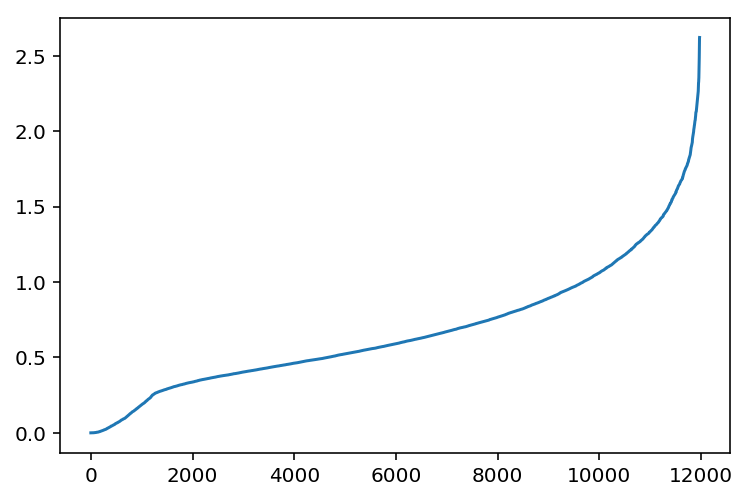

In [44]:
plt.plot(sorted(spe_marker_frp.Other.values))
plt.show()

In [45]:
spe_marker_frp=spe_marker_frp[spe_marker_frp.Other<1]
spe_marker_frp

,Other,mean_FD,p_value,stage,target
cell,,,,,
CRIP1,0.139281,3.531269,0.000000e+00,1DN,3.670550
LY6D,0.000000,2.930647,0.000000e+00,1DN,2.930647
WDR89,0.160890,2.644104,1.834103e-256,1DN,2.804994
LY6E,0.472263,2.388545,2.599497e-162,1DN,2.860808
THY1,0.000000,2.167343,0.000000e+00,1DN,2.167343
PLAC8,0.729475,1.772310,4.828839e-82,1DN,2.501786
EEF1G,0.542505,1.770685,3.167890e-99,1DN,2.313189
RAMP1,0.000000,1.702766,0.000000e+00,1DN,1.702766
PTPRCAP,0.333519,1.676743,2.389666e-111,1DN,2.010262


In [46]:
mouse_list=[]
human_list=[]
for i in spe_marker_frp.stage.unique():

    spe_marker_frp_stage=spe_marker_frp[spe_marker_frp.stage==i]
    human_marker_stage=human_marker[human_marker.source==i]
   
    human_specific=spe_marker_frp_stage[-400:]
    human_specific=human_specific.ix[human_marker_stage.index]
    human_specific.dropna(inplace=True)
    mouse_marker_stage=mouse_marker[mouse_marker.source==i]
    
    mouse_specific=spe_marker_frp_stage[0:400]
    mouse_specific=mouse_specific.ix[mouse_marker_stage.index]
    mouse_specific.dropna(inplace=True)
    for gene in human_specific.index.tolist():
        human_list.append(gene)
    for gene in mouse_specific.index.tolist():
        mouse_list.append(gene)
gene_list=human_list+mouse_list
gene_list

1DN
(922, 6)
(271, 6)
2ISP
(2188, 6)
(615, 6)
3DPbla
(1358, 6)
(759, 6)
4DPre
(173, 6)
(174, 6)
5DPsel
(91, 6)
(132, 6)
6CD4
(348, 6)
(155, 6)
7CD8
(389, 6)
(193, 6)


['HIVEP3',
 'SOCS2',
 'CHST12',
 'REPIN1',
 'MAPKAPK3',
 'FHIT',
 'RAPGEF5',
 'NME4',
 'KCTD9',
 'CDK5RAP3',
 'BAZ2B',
 'PCGF5',
 'MYL6B',
 'ERN1',
 'TBCD',
 'LARS',
 'HSPA1A',
 'GNAQ',
 'GSTK1',
 'LYSMD2',
 'UBE2E2',
 'EBPL',
 'SLC25A29',
 'SCCPDH',
 'CKLF',
 'VAMP5',
 'SLC43A2',
 'UBE2L6',
 'ERCC1',
 'CD300A',
 'BAHCC1',
 'ABI2',
 'ZKSCAN1',
 'CLEC11A',
 'GNPTAB',
 'RAD50',
 'CMTM8',
 'GUCY1A3',
 'PXMP2',
 'LITAF',
 'SND1',
 'APBA2',
 'ARHGAP5',
 'TASP1',
 'ETV6',
 'SEC31A',
 'TCEA2',
 'SPRY1',
 'DNAJC19',
 'CPNE1',
 'SSR3',
 'STOML2',
 'FRMD4B',
 'TRIM56',
 'ZBTB44',
 'RANBP2',
 'NCBP2',
 'MRPL3',
 'MTIF3',
 'DDT',
 'ABCC1',
 'CLPP',
 'MPP1',
 'KARS',
 'FYTTD1',
 'VPS35',
 'ABHD14B',
 'CHD9',
 'MGMT',
 'ZNF711',
 'MLXIP',
 'METTL5',
 'IGBP1',
 'RAD23A',
 'DYNC1H1',
 'DNAJB9',
 'YWHAG',
 'WIPF1',
 'PFDN4',
 'NF1',
 'TIMP2',
 'STAU2',
 'UROS',
 'SEC63',
 'CASP4',
 'EXOC7',
 'YTHDF2',
 'GOLGB1',
 'DNAJC4',
 'ZNF580',
 'ABCA1',
 'DBN1',
 'BCL11A',
 'TRIM44',
 'BDH1',
 'PDCD2',
 'SERPINB

In [47]:
merge_stage_aver_spe=merge_stage_aver.ix[gene_list]
merge_stage_aver_spe.drop_duplicates(inplace=True)
merge_stage_aver_spe

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
HIVEP3,0.944363,0.736633,0.245055,0.090644,0.506189,0.192529,0.110381,0.337311,0.229255,0.158616,0.060809,0.455725,0.082063,0.167999
SOCS2,0.705725,0.656948,0.011129,0.008183,0.000000,0.038207,0.019913,0.101154,0.008490,0.004663,0.001717,0.002360,0.013249,0.000000
CHST12,0.786994,0.814103,0.213599,0.105762,0.089631,0.061496,0.163077,0.078951,0.089491,0.107663,0.092314,0.082280,0.085713,0.099846
REPIN1,0.845317,0.767695,0.323046,0.280684,0.169101,0.127033,0.140381,0.359107,0.054983,0.044967,0.014074,0.015791,0.007231,0.011975
MAPKAPK3,0.820454,0.876062,0.212715,0.263928,0.145257,0.211056,0.184781,0.007623,0.024174,0.018830,0.050913,0.078094,0.117326,0.129157
FHIT,0.808242,0.635559,0.160414,0.066281,0.136566,0.761812,0.436049,0.032773,0.023718,0.026172,0.039537,0.039392,0.004179,0.011136
RAPGEF5,0.708320,0.387705,0.333270,0.116158,0.049545,0.017716,0.022600,0.000000,0.011007,0.009843,0.000000,0.003311,0.001890,0.000000
NME4,0.762303,1.050474,0.395491,0.071126,0.091390,0.169528,0.161998,0.207641,0.191400,0.060096,0.029217,0.062310,0.082790,0.086971
KCTD9,0.692002,0.615445,0.314486,0.086635,0.098532,0.074042,0.081145,0.021012,0.044277,0.084680,0.020898,0.021071,0.017566,0.024995


In [49]:
#计算gene correlation

In [51]:

human_data_norm_homo_order_percent=pd.DataFrame(index=human_data_norm_homo_order.index)
for i in range(0,14850,150):
   

    a=human_data_norm_homo_order.iloc[:,list(range(i,i+150))]
    

    human_data_norm_homo_order_percent[float(i)/14850]=a.mean(axis=1)
human_data_norm_homo_order_percent[float(14977)/14977]=human_data_norm_homo_order.iloc[:,list(range(14850,14977))].mean(axis=1)

mouse_data_norm_homo_order_percent=pd.DataFrame(index=mouse_data_norm_homo_order.index)
for i in range(0,3168,32):
   

    a=mouse_data_norm_homo_order.iloc[:,list(range(i,i+32))]
    

    mouse_data_norm_homo_order_percent[float(i)/3168]=a.mean(axis=1)
mouse_data_norm_homo_order_percent[float(3185)/3185]=mouse_data_norm_homo_order.iloc[:,list(range(3168,3185))].mean(axis=1)


In [52]:
gene=[]
cor=[]
for i in mouse_data_norm_homo_order_percent.index.tolist():
    if i in human_data_norm_homo_order_percent.index.tolist():
        gene.append(i)
        cor.append(np.corrcoef(mouse_data_norm_homo_order_percent.ix[i],human_data_norm_homo_order_percent.ix[i])[0][1])
correlation=pd.DataFrame(cor,index=gene)        

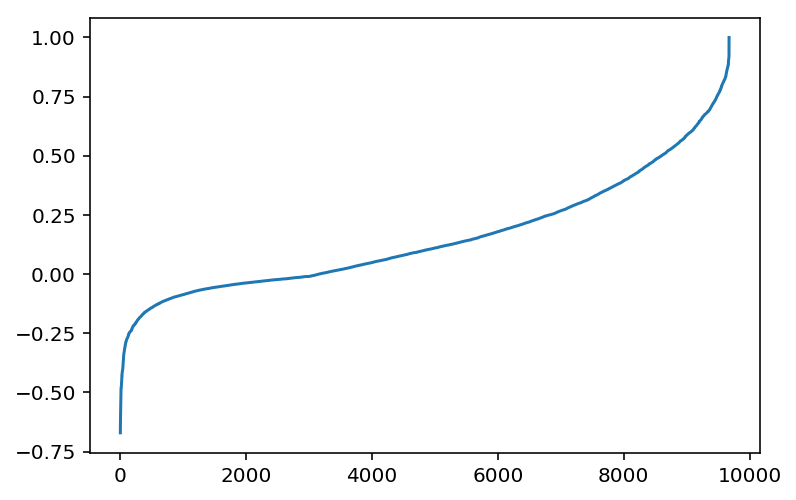

In [53]:
correlation.dropna(inplace=True)
plt.plot(sorted(correlation.values))
plt.show()

In [54]:
correlation_nega=correlation[correlation.loc[:,0]<0.25]
correlation_nega

,0
AACS,0.023435
AAK1,0.230185
AAMP,0.125119
AATF,0.110922
AATK,-0.036179
ABAT,-0.063901
ABCA1,-0.032827
ABCA2,0.019115
ABCA3,-0.047270
ABCA5,0.034133


In [55]:
correlation_nega.sort_values(0)

,0
HSP90AA1,-0.670509
MAD1L1,-0.631806
UQCRB,-0.618522
AGTRAP,-0.606497
ICAM2,-0.588321
HMOX2,-0.576623
DHRS3,-0.532984
USP3,-0.530933
PTPRA,-0.524677
CD82,-0.493023


In [56]:
overlap_cornega=[i for i in merge_stage_aver_spe.index.tolist() if i in correlation_nega.index.tolist()]
overlap_cornega

['HIVEP3',
 'CHST12',
 'MAPKAPK3',
 'FHIT',
 'KCTD9',
 'MYL6B',
 'TBCD',
 'LARS',
 'HSPA1A',
 'GNAQ',
 'GSTK1',
 'LYSMD2',
 'UBE2E2',
 'EBPL',
 'SLC25A29',
 'SCCPDH',
 'CKLF',
 'VAMP5',
 'SLC43A2',
 'UBE2L6',
 'ERCC1',
 'CD300A',
 'ABI2',
 'ZKSCAN1',
 'CMTM8',
 'GUCY1A3',
 'LITAF',
 'APBA2',
 'ARHGAP5',
 'TASP1',
 'ETV6',
 'SEC31A',
 'TCEA2',
 'SPRY1',
 'CPNE1',
 'SSR3',
 'FRMD4B',
 'TRIM56',
 'MTIF3',
 'ABCC1',
 'ABHD14B',
 'CHD9',
 'MGMT',
 'ZNF711',
 'MLXIP',
 'METTL5',
 'IGBP1',
 'DYNC1H1',
 'DNAJB9',
 'WIPF1',
 'NF1',
 'TIMP2',
 'STAU2',
 'UROS',
 'SEC63',
 'CASP4',
 'EXOC7',
 'GOLGB1',
 'DNAJC4',
 'ZNF580',
 'ABCA1',
 'DBN1',
 'BCL11A',
 'TRIM44',
 'BDH1',
 'PDCD2',
 'C1orf43',
 'EIF2AK2',
 'CAMLG',
 'MACF1',
 'SLC25A36',
 'TBCB',
 'TAF9',
 'MIDN',
 'SPN',
 'UBE2J1',
 'TRABD',
 'FBXO25',
 'TATDN1',
 'PAFAH2',
 'KIAA0907',
 'ATXN10',
 'ARL5A',
 'PUM1',
 'ZNF493',
 'ERICH1',
 'INTS10',
 'UFM1',
 'MAGED1',
 'STMN3',
 'EPM2AIP1',
 'TTC7A',
 'ZNHIT1',
 'ORMDL1',
 'GADD45A',
 'NARF',
 

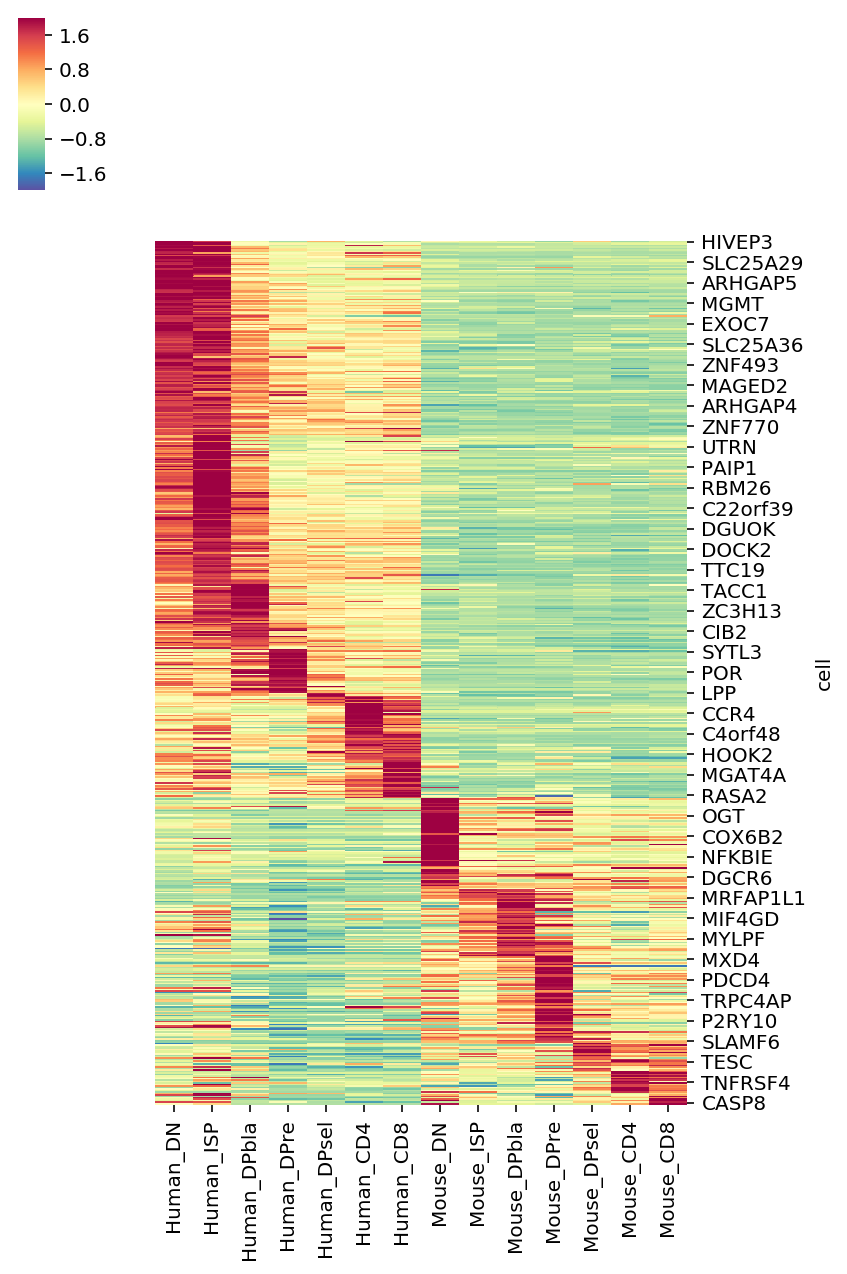

In [57]:
merge_stage_aver_spe_cornega=merge_stage_aver_spe.ix[overlap_cornega]
#merge_stage_aver_spe_cornega.to_csv('../human_mouse/difference/merge_stage_spe_cornega.txt',sep='\t')
sns.clustermap(merge_stage_aver_spe_cornega,row_cluster=False,col_cluster=False,
               cmap='Spectral_r',z_score=0,vmax=2,vmin=-2,figsize=(6,10))
#plt.savefig('../human_mouse/difference/human_mouse_stage_spe_cornega.pdf',bbox_inches='tight')
plt.show()

# merge all filter data

In [58]:
merge_stage_aver_spe_cornega_human=merge_stage_aver_spe_cornega.ix[human_list]
merge_stage_aver_spe_cornega_human.dropna(inplace=True)
merge_stage_aver_spe_cornega_mouse=merge_stage_aver_spe_cornega.ix[mouse_list]
merge_stage_aver_spe_cornega_mouse.dropna(inplace=True)
merge_stage_aver_spe_cornega_human

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
HIVEP3,0.944363,0.736633,0.245055,0.090644,0.506189,0.192529,0.110381,0.337311,0.229255,0.158616,0.060809,0.455725,0.082063,0.167999
CHST12,0.786994,0.814103,0.213599,0.105762,0.089631,0.061496,0.163077,0.078951,0.089491,0.107663,0.092314,0.082280,0.085713,0.099846
MAPKAPK3,0.820454,0.876062,0.212715,0.263928,0.145257,0.211056,0.184781,0.007623,0.024174,0.018830,0.050913,0.078094,0.117326,0.129157
FHIT,0.808242,0.635559,0.160414,0.066281,0.136566,0.761812,0.436049,0.032773,0.023718,0.026172,0.039537,0.039392,0.004179,0.011136
KCTD9,0.692002,0.615445,0.314486,0.086635,0.098532,0.074042,0.081145,0.021012,0.044277,0.084680,0.020898,0.021071,0.017566,0.024995
MYL6B,0.971745,1.070620,0.698031,0.421654,0.354236,0.232372,0.207955,0.055013,0.050261,0.042815,0.063560,0.015937,0.004236,0.022929
TBCD,0.787016,0.839502,0.397628,0.332215,0.147534,0.108483,0.087127,0.099456,0.086577,0.087586,0.084252,0.061962,0.040936,0.076849
LARS,0.904553,1.051519,0.571697,0.230896,0.373147,0.432951,0.466159,0.099626,0.152655,0.128119,0.091381,0.124304,0.095595,0.113432
HSPA1A,0.850249,0.552478,0.179974,0.231310,0.367203,0.820070,0.715798,0.000000,0.002504,0.001042,0.000000,0.003085,0.000000,0.000000


In [59]:
merge_mouse_dropout=merge_mouse_dropout[['Human_DN','Human_ISP','Human_DPbla','Human_DPre','Human_DPsel',
                            'Human_CD4','Human_CD8','Mouse_DN','Mouse_ISP','Mouse_DPbla',
                            'Mouse_DPre','Mouse_DPsel',
                            'Mouse_CD4','Mouse_CD8']]
merge_mouse_dropout

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
A1BG,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADAT,0.015922,0.050065,0.032122,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AASS,0.034315,0.047676,0.042527,0.022127,0.015903,0.004802,0.004570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA5,0.094154,0.047669,0.081616,0.058775,0.059272,0.067653,0.070757,0.000000,0.000000,0.000000,0.000000,0.000000,0.004189,0.000000
ABCA6,0.008930,0.004468,0.003947,0.003422,0.007133,0.001259,0.000921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA8,0.005150,0.002564,0.002756,0.003513,0.001572,0.001444,0.003140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC2,0.001916,0.003866,0.003419,0.004740,0.001266,0.001732,0.000959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC8,0.030534,0.019803,0.000613,0.000000,0.000000,0.000000,0.000000,0.000000,0.001418,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
merge_all_order=pd.concat([merge_mouse_dropout,merge_stage_aver_spe_cornega_human,
                     merge_human_dropout,merge_stage_aver_spe_cornega_mouse])
merge_all_human=pd.concat([merge_mouse_dropout,merge_stage_aver_spe_cornega_human])
merge_all_mouse=pd.concat([merge_human_dropout,merge_stage_aver_spe_cornega_mouse])
merge_all_order.drop_duplicates(inplace=True)
#merge_all_order.to_csv('../human_mouse/difference/merge_all_order.txt',sep='\t')
merge_all_order

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
A1BG,0.864553,0.869666,0.379683,0.509377,0.582439,0.321856,0.702774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.003817,0.011858,0.003500,0.003600,0.009094,0.002974,0.005328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AADAT,0.015922,0.050065,0.032122,0.005208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AASS,0.034315,0.047676,0.042527,0.022127,0.015903,0.004802,0.004570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA5,0.094154,0.047669,0.081616,0.058775,0.059272,0.067653,0.070757,0.000000,0.000000,0.000000,0.000000,0.000000,0.004189,0.000000
ABCA6,0.008930,0.004468,0.003947,0.003422,0.007133,0.001259,0.000921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCA8,0.005150,0.002564,0.002756,0.003513,0.001572,0.001444,0.003140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC2,0.001916,0.003866,0.003419,0.004740,0.001266,0.001732,0.000959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABCC8,0.030534,0.019803,0.000613,0.000000,0.000000,0.000000,0.000000,0.000000,0.001418,0.000000,0.000000,0.000000,0.000000,0.000000


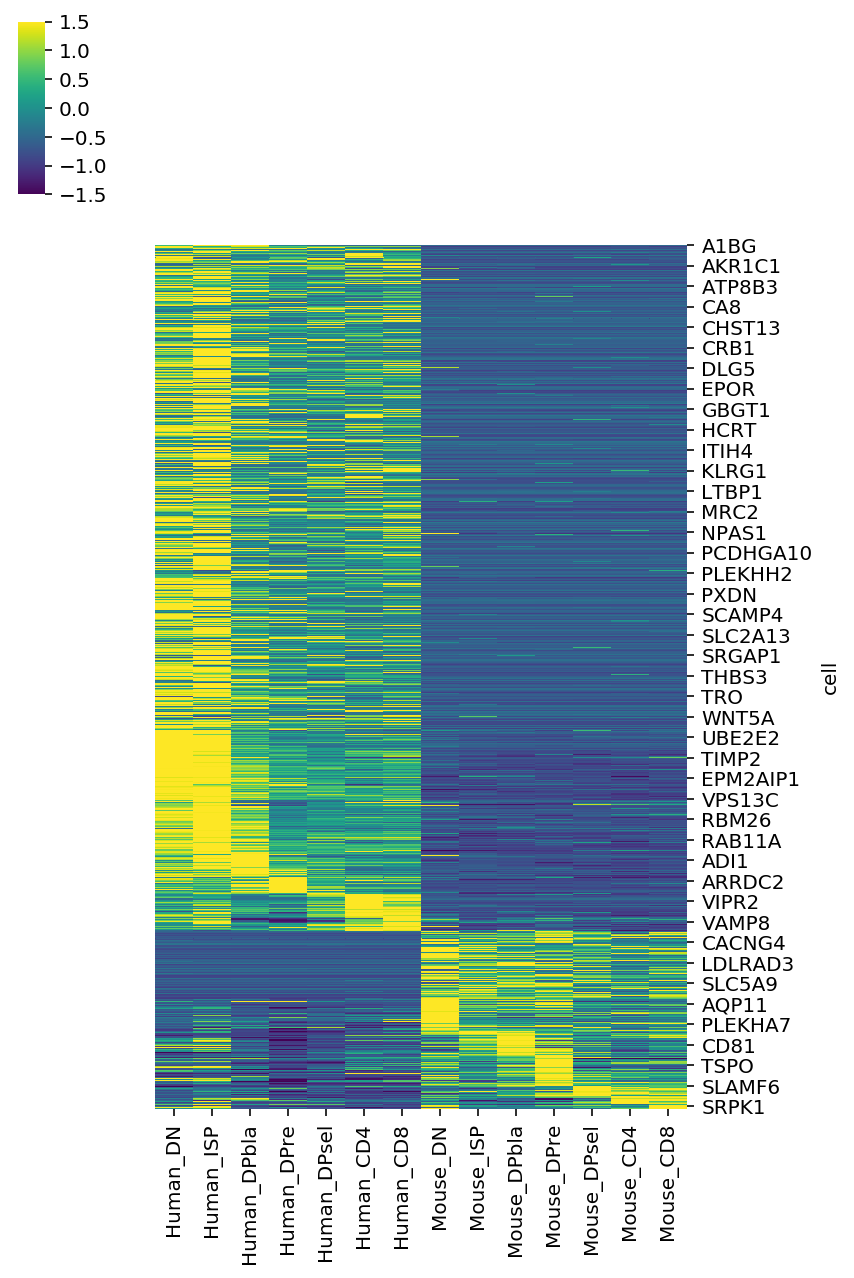

In [61]:
sns.clustermap(merge_all_order,row_cluster=False,col_cluster=False,
               cmap='viridis',z_score=0,vmax=1.5,vmin=-1.5,figsize=(6,10))
#plt.savefig('../human_mouse/difference/merge_all_order.pdf',bbox_inches='tight')
plt.show()

In [62]:
tf=pd.read_table('../data/DatabaseExtract_v_1.01.txt',index_col=0)
tf=tf[tf['Is TF?']=='Yes']
tf=tf[tf['TF assessment']=='Known motif']
merge_dropout_tf=merge_dropout.ix[tf['HGNC symbol'].tolist()]
merge_dropout_tf.dropna(inplace=True)
merge_dropout_tf

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
cell,,,,,,,,,,,,,,
HES2,0.006991,0.004759,0.003385,0.003338,0.000000,0.008416,0.002596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MESP1,0.005838,0.061282,0.032904,0.002139,0.003522,0.000000,0.001745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MLXIPL,0.011167,0.004981,0.003769,0.003799,0.003616,0.004357,0.003697,0.000000,0.000000,0.000777,0.000000,0.000000,0.000000,0.000000
TCFL5,0.093477,0.122869,0.062420,0.023648,0.012938,0.010440,0.009813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CEBPE,0.002116,0.007041,0.000656,0.000321,0.011576,0.012062,0.028485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CREB3L4,0.265427,0.231127,0.120279,0.082973,0.024446,0.013111,0.040934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FOSL1,0.009882,0.060898,0.008490,0.010163,0.011276,0.002687,0.005619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MAFA,0.003846,0.004367,0.003042,0.009829,0.003392,0.000000,0.003764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NRL,0.051420,0.066346,0.087787,0.072446,0.089412,0.024504,0.033164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


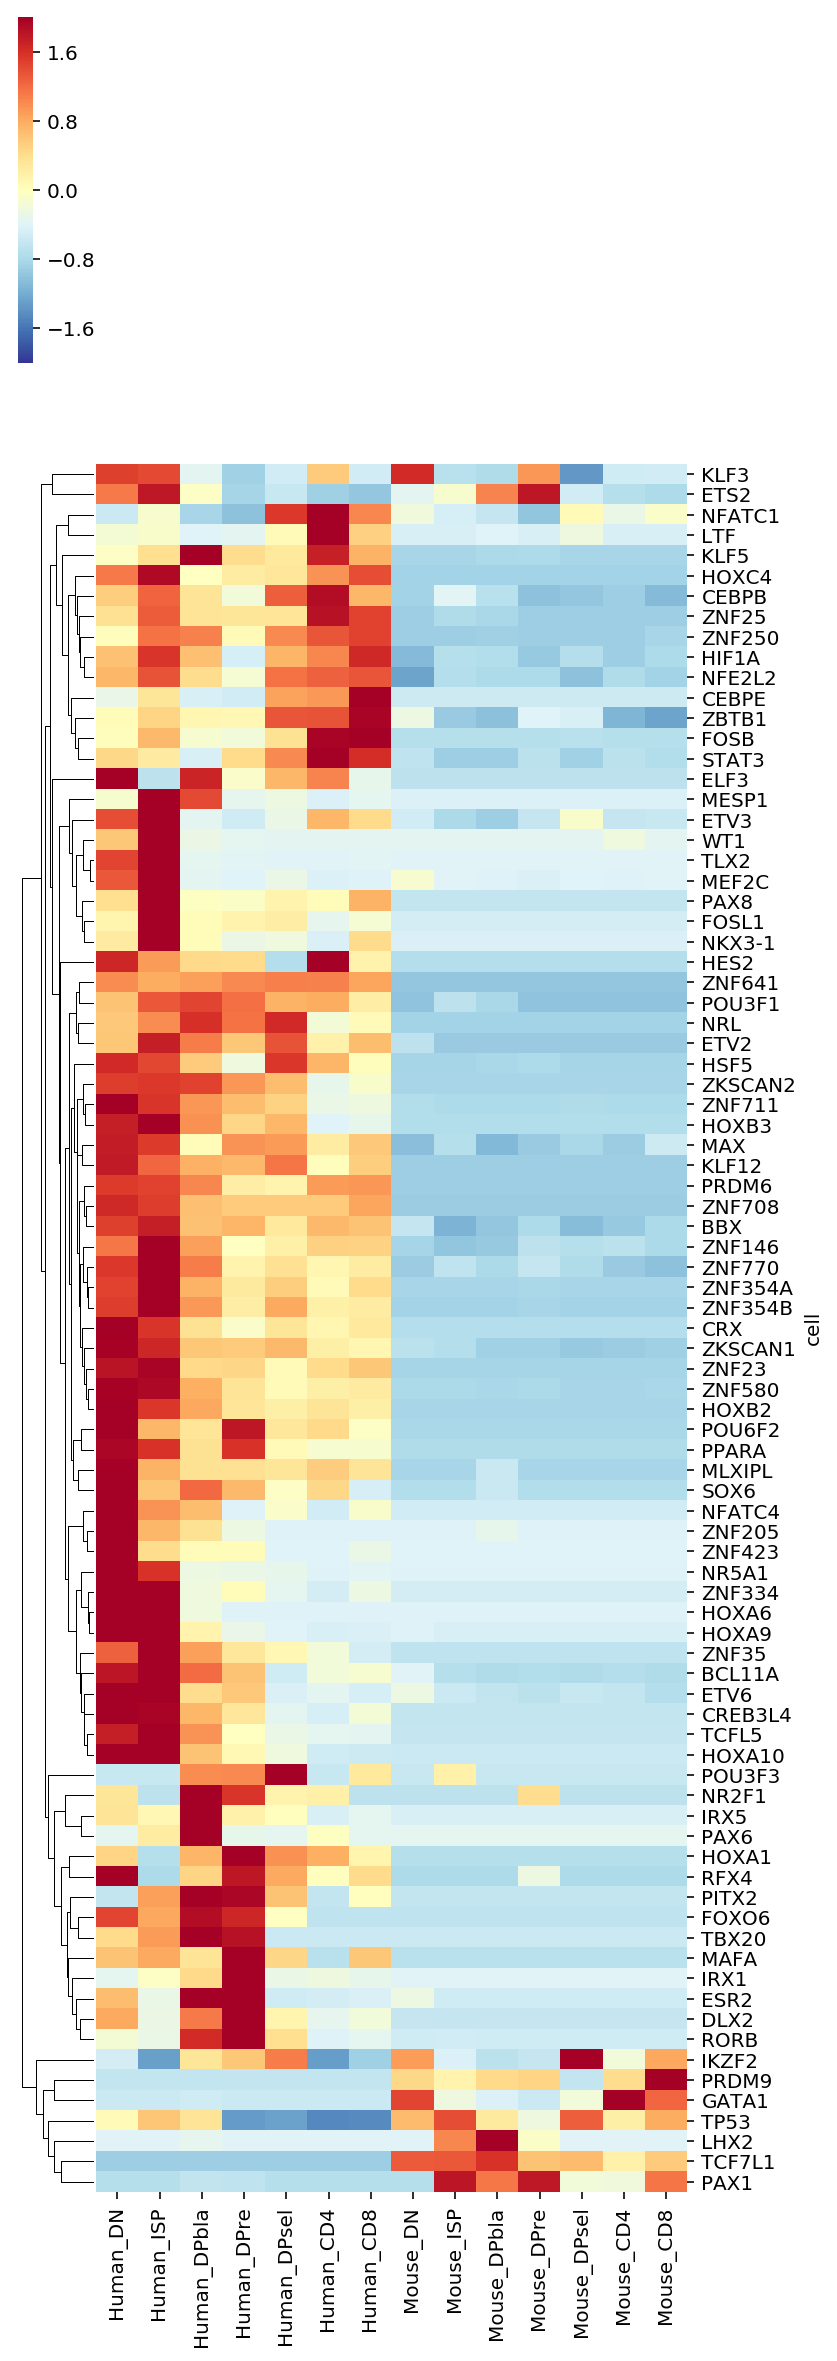

In [63]:
merge_all_tf=merge_all_order.ix[tf['HGNC symbol'].tolist()]
merge_all_tf.dropna(inplace=True)
sns.clustermap(merge_all_tf,row_cluster=True,col_cluster=False,
               cmap='RdYlBu_r',z_score=0,vmax=2,vmin=-2,figsize=(6,20))
#plt.savefig('../human_mouse/difference/mrege_all_tf.pdf',bbox_inches='tight')
plt.show()

In [66]:
#TF network

In [64]:
human_specific_cornega=correlation_nega.ix[human_list]
human_specific_cornega.dropna(inplace=True)

human_gene_list_all=merge_mouse_dropout.index.tolist()+human_specific_cornega.index.tolist()

human_gene_list_all

['A1BG',
 'A2M',
 'AADAT',
 'AASS',
 'ABCA5',
 'ABCA6',
 'ABCA8',
 'ABCC2',
 'ABCC8',
 'ABCD2',
 'ABCG4',
 'ABHD3',
 'ABI3BP',
 'ABO',
 'ACOT1',
 'ACOT11',
 'ACOT4',
 'ACSL6',
 'ACSM3',
 'ACVR1',
 'ADAM22',
 'ADAM23',
 'ADAMTS1',
 'ADAMTSL3',
 'ADARB2',
 'ADCY2',
 'ADCY4',
 'ADD2',
 'ADHFE1',
 'ADM2',
 'ADPRHL1',
 'ADRB1',
 'AEBP1',
 'AFAP1L2',
 'AFF2',
 'AGBL2',
 'AGMAT',
 'AK1',
 'AK5',
 'AKR1C1',
 'ALDH1A2',
 'ALDH8A1',
 'ALG13',
 'ALOX5',
 'ALS2CR12',
 'AMDHD1',
 'AMPH',
 'ANKAR',
 'ANKDD1A',
 'ANKFN1',
 'ANKRD1',
 'ANKRD42',
 'ANKRD7',
 'ANKS6',
 'ANPEP',
 'ANTXR1',
 'AOX1',
 'APOL6',
 'AQP1',
 'ARG2',
 'ARHGAP23',
 'ARHGEF19',
 'ARL9',
 'ARMC4',
 'ARNTL2',
 'ARRDC5',
 'ASB16',
 'ASB9',
 'ASGR1',
 'ASPHD2',
 'ASTN2',
 'ATF7IP2',
 'ATP13A4',
 'ATP6V0A4',
 'ATP6V0E2',
 'ATP6V1E2',
 'ATP7B',
 'ATP8B1',
 'ATP8B3',
 'AVP',
 'AVPR1A',
 'B3GALNT1',
 'B3GNT4',
 'B4GALT2',
 'BAALC',
 'BACE2',
 'BEST1',
 'BEST3',
 'BFSP1',
 'BICC1',
 'BMPR1B',
 'BRSK1',
 'BTN2A2',
 'C10orf10',
 'C10orf53',


In [65]:
SP_tf=['LTF','KLF5','HOXC4','CEBPB','ZNF25','ZNF250','HIF1A','NFE2L2','CEBPE','ZBTB1','FOSB','STAT3']
gsea=open('../data/c3.tft.v7.2.symbols.gmt','r')
lines=gsea.readlines()
tf=[]
gene=[]
for line in lines:
    item=line.split('\t')
    if item[0].split('_')[0] in SP_tf:
        for i in item[2:]:
            if i in human_gene_list_all:
            
                tf.append(item[0].split('_')[0])
                gene.append(i)
    if item[0].split('_')[1] in SP_tf:
        for i in item[2:]:
            if i in human_gene_list_all:
            
                tf.append(item[0].split('_')[1])
                gene.append(i)
human_sp=pd.DataFrame(gene,index=tf,columns=['gene'])
human_sp.drop_duplicates(inplace=True)
cor=[]
for i in range(human_sp.shape[0]):
    tf=human_sp.index.tolist()[i]
    j=human_sp.values.tolist()[i]
    cor.append(np.corrcoef(human_data_norm_homo_order_percent.ix[tf],human_data_norm_homo_order_percent.ix[j])[0][1])


human_sp   

,gene
CEBPB,FHIT
CEBPB,VPS13C
CEBPB,PITX2
CEBPB,MAGED2
CEBPB,PPP1R3D
CEBPB,KLF5
CEBPB,FGF9
CEBPB,ASGR1
CEBPB,DLG2
CEBPB,TOB1


In [66]:
DN_tf=['KLF3','ETS2','ELF3','MESP1','WT1','TLX2','PAX8','FOSL1','NKX3-1',
       'HES2','ZNF641','POU3F1','NRL','ETV2','HSF5','ZKSCAN2','ZNF711','HOXB3',
       'MAX','KLF12','PRDM6','ZNF708','BBX','ZNF146','ZNF354A','ZNF354B','CRX',
       'ZKSCAN1','ZNF23','ZNF580','HOXB2','POU6F2','PPARA','MLXIPL','SOX6',
       'NFATC4','ZNF205','ZNF423','NR5A1','ZNF334','HOXA6','HOXA9','ZNF35',
       'BCL11A','ETV6','CREB3L4','TCFL5','HOXA10','POU3F3','NR2F1','IRX5',
       'PAX6','HOXA1','RFX4','PITX2','FOXO6','TBX20','MAFA','IRX1','ESR2',
       'DLX2','RORB']
gsea=open('../data/c3.tft.v7.2.symbols.gmt','r')
lines=gsea.readlines()
tf=[]
gene=[]
for line in lines:
    item=line.split('\t')
    if item[0].split('_')[0] in DN_tf:
        for i in item[2:]:
            if i in human_gene_list_all:
            
                tf.append(item[0].split('_')[0])
                gene.append(i)
    if item[0].split('_')[1] in DN_tf:
        for i in item[2:]:
            if i in human_gene_list_all:
            
                tf.append(item[0].split('_')[1])
                gene.append(i)
human_DN=pd.DataFrame(gene,index=tf,columns=['gene'])
human_DN.drop_duplicates(inplace=True)
cor=[]
for i in range(human_DN.shape[0]):
    tf=human_DN.index.tolist()[i]
    j=human_DN.values.tolist()[i]
    cor.append(np.corrcoef(human_data_norm_homo_order_percent.ix[tf],human_data_norm_homo_order_percent.ix[j])[0][1])

#human_DN.to_csv('../human_mouse/difference/human_DN_tf_gene.txt',sep='\t')
human_DN   

,gene
PAX6,RORB
PAX6,HRK
PAX6,CACNA1C
PAX6,CPA4
PAX6,SERTAD4
PAX6,JPH1
PAX6,JARID2
PAX6,LRRN2
MAX,PHF20
MAX,FKBP11


In [67]:
mouse_specific_cornega=correlation_nega.ix[mouse_list]
mouse_specific_cornega.dropna(inplace=True)

mouse_gene_list_all=merge_human_dropout.index.tolist()+mouse_specific_cornega.index.tolist()

mouse_gene_list_all

['ABCA3',
 'ABCB4',
 'ACADL',
 'ACPP',
 'AFP',
 'AGRP',
 'ALDH1A3',
 'AMPD1',
 'APOA2',
 'APOBEC1',
 'ARSI',
 'ART1',
 'ART5',
 'B4GALNT1',
 'C16orf90',
 'C3orf70',
 'C6orf118',
 'C6orf222',
 'C8G',
 'C9orf50',
 'CACNA1E',
 'CACNG4',
 'CAMK2A',
 'CAMK2N2',
 'CAMKV',
 'CCDC63',
 'CHL1',
 'COMP',
 'CORO2B',
 'COX6A2',
 'CTSE',
 'DKKL1',
 'DQX1',
 'DZIP1',
 'EGF',
 'EIF1AY',
 'ESM1',
 'EYA2',
 'F2RL3',
 'FBXO17',
 'FBXW10',
 'FGF13',
 'FXYD4',
 'GATA1',
 'GPR83',
 'GSTT2B',
 'HIST3H3',
 'HMGCS2',
 'HMP19',
 'HOMER3',
 'HYAL1',
 'IL17RB',
 'IL1RL2',
 'IL2',
 'INSL5',
 'INSL6',
 'ITGB3',
 'KLK8',
 'KRT7',
 'LAD1',
 'LDLRAD3',
 'LGALS7',
 'LHX2',
 'LPL',
 'LY6K',
 'MORC1',
 'MRGPRE',
 'NPHS2',
 'OTOS',
 'PADI1',
 'PADI2',
 'PADI3',
 'PAQR5',
 'PAX1',
 'PCDHGC4',
 'PDCD1LG2',
 'PGLYRP1',
 'PLEKHG3',
 'PNCK',
 'PPAN-P2RY11',
 'PPIC',
 'PPP1R1B',
 'PRDM9',
 'PRODH',
 'PRRG1',
 'PTH',
 'RAB6B',
 'RDH12',
 'RPGRIP1',
 'SBSN',
 'SCN2B',
 'SCN4B',
 'SDC1',
 'SDC3',
 'SERPINC1',
 'SLC15A1',
 'SLC22A

In [68]:
SP_tf=['KLF3','ETS2','IKZF2','PRDM9','GATA1','TP53','LHX2','TCF7L1','PAX1']
gsea=open('../data/c3.tft.v7.2.symbols.gmt','r')
lines=gsea.readlines()
tf=[]
gene=[]
for line in lines:
    item=line.split('\t')
    if item[0].split('_')[0] in SP_tf:
        for i in item[2:]:
            if i in mouse_gene_list_all:
            
                tf.append(item[0].split('_')[0])
                gene.append(i)
    if item[0].split('_')[1] in SP_tf:
        for i in item[2:]:
            if i in mouse_gene_list_all:
            
                tf.append(item[0].split('_')[1])
                gene.append(i)
mouse_sp=pd.DataFrame(gene,index=tf,columns=['gene'])
mouse_sp.drop_duplicates(inplace=True)
cor=[]
for i in range(mouse_sp.shape[0]):
    tf=mouse_sp.index.tolist()[i]
    j=mouse_sp.values.tolist()[i]
    cor.append(np.corrcoef(mouse_data_norm_homo_order_percent.ix[tf],mouse_data_norm_homo_order_percent.ix[j])[0][1])

#mouse_sp.to_csv('../human_mouse/difference/mouse_sp_tf_gene.txt',sep='\t')
mouse_sp   

,gene
GATA1,MRPL40
GATA1,XRCC6
GATA1,NTRK3
GATA1,TCF7L1
GATA1,AP3S1
GATA1,SH3KBP1
GATA1,IKZF2
GATA1,FGF13
GATA1,PRELID1
GATA1,P2RY10


In [69]:
merge_tf_human=pd.concat([human_sp,human_DN])

#merge_tf=merge_tf[merge_tf.type!='norm']
merge_tf_human

,gene
CEBPB,FHIT
CEBPB,VPS13C
CEBPB,PITX2
CEBPB,MAGED2
CEBPB,PPP1R3D
CEBPB,KLF5
CEBPB,FGF9
CEBPB,ASGR1
CEBPB,DLG2
CEBPB,TOB1


In [70]:
#TF enrichment pvalue
import scipy.stats as stats
gsea=open('../data/c3.tft.v7.2.symbols.gmt','r')
lines=gsea.readlines()
tf=[]
p=[]
for line in lines:
    item=line.split('\t')
    t=item[0].split('_')[0]
    if t in merge_tf_human.index.unique():
        
        tf.append(t)
        overlap=merge_tf_human.ix[t].shape[0]
        tf_gene=len(item[1:])
        pv=stats.fisher_exact([[overlap,overlap],[overlap,tf_gene]])[1]
        p.append(pv)
    t1=item[0].split('_')[1]   
    if t1 in merge_tf_human.index.unique():
        tf.append(t1)
        overlap=merge_tf_human.ix[t1].shape[0]
        tf_gene=len(item[1:])
        pv=stats.fisher_exact([[overlap,overlap],[overlap,tf_gene]])[1]
        p.append(pv)

In [71]:
import numpy as np
merge_tf_pvalue=pd.DataFrame(p,index=tf,columns=['Pvalue'])
merge_tf_pvalue.drop_duplicates(inplace=True)
merge_tf_pvalue=merge_tf_pvalue[merge_tf_pvalue.Pvalue<0.001]
merge_tf_pvalue['tf']=merge_tf_pvalue.index.tolist()
merge_tf_pvalue=merge_tf_pvalue.groupby('tf').mean()
merge_tf_pvalue['log']=-np.log10(merge_tf_pvalue)
merge_tf_pvalue

,Pvalue,log
tf,,
CEBPB,2.986571e-11,10.524827
CREB3L4,8.267176e-35,34.082643
CRX,3.449563e-10,9.462236
DLX2,5.593754e-10,9.252297
ETS2,1.261952e-09,8.898957
HES2,2.417146e-40,39.616697
HOXA10,4.284293e-08,7.368121
MAX,9.079489e-09,8.041939
PAX6,7.456008e-05,4.127494


In [72]:
import scipy.stats as stats
gsea=open('../data/c3.tft.v7.2.symbols.gmt','r')
lines=gsea.readlines()
tf=[]
p=[]
for line in lines:
    item=line.split('\t')
    t=item[0].split('_')[0]
    if t in mouse_sp.index.unique():
        
        tf.append(t)
        overlap=mouse_sp.ix[t].shape[0]
        tf_gene=len(item[1:])
        pv=stats.fisher_exact([[overlap,overlap],[overlap,tf_gene]])[1]
        p.append(pv)
    t1=item[0].split('_')[1]   
    if t1 in mouse_sp.index.unique():
        tf.append(t1)
        overlap=mouse_sp.ix[t1].shape[0]
        tf_gene=len(item[1:])
        pv=stats.fisher_exact([[overlap,overlap],[overlap,tf_gene]])[1]
        p.append(pv)
import numpy as np
merge_tf_pvalue_mouse=pd.DataFrame(p,index=tf,columns=['Pvalue'])
merge_tf_pvalue_mouse.drop_duplicates(inplace=True)
merge_tf_pvalue_mouse=merge_tf_pvalue_mouse[merge_tf_pvalue_mouse.Pvalue<0.001]
merge_tf_pvalue_mouse['tf']=merge_tf_pvalue_mouse.index.tolist()
merge_tf_pvalue_mouse=merge_tf_pvalue_mouse.groupby('tf').mean()
merge_tf_pvalue_mouse['log']=-np.log10(merge_tf_pvalue_mouse)
merge_tf_pvalue_mouse

,Pvalue,log
tf,,
ETS2,7.914653e-12,11.101568
GATA1,1.589022e-09,8.798870


In [73]:
for i in ['Human_DN','Human_ISP','Human_DPbla','Human_DPre','Human_DPsel',
                            'Human_CD4','Human_CD8']:
    merge_tf_pvalue[i]=merge_tf_pvalue.log
merge_tf_pvalue.drop(['Pvalue','log'],axis=1,inplace=True)
merge_tf_pvalue

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8
tf,,,,,,,
CEBPB,10.524827,10.524827,10.524827,10.524827,10.524827,10.524827,10.524827
CREB3L4,34.082643,34.082643,34.082643,34.082643,34.082643,34.082643,34.082643
CRX,9.462236,9.462236,9.462236,9.462236,9.462236,9.462236,9.462236
DLX2,9.252297,9.252297,9.252297,9.252297,9.252297,9.252297,9.252297
ETS2,8.898957,8.898957,8.898957,8.898957,8.898957,8.898957,8.898957
HES2,39.616697,39.616697,39.616697,39.616697,39.616697,39.616697,39.616697
HOXA10,7.368121,7.368121,7.368121,7.368121,7.368121,7.368121,7.368121
MAX,8.041939,8.041939,8.041939,8.041939,8.041939,8.041939,8.041939
PAX6,4.127494,4.127494,4.127494,4.127494,4.127494,4.127494,4.127494


In [74]:
for i in ['Mouse_DN','Mouse_ISP','Mouse_DPbla',
                            'Mouse_DPre','Mouse_DPsel',
                            'Mouse_CD4','Mouse_CD8']:
    merge_tf_pvalue_mouse[i]=merge_tf_pvalue_mouse.log
merge_tf_pvalue_mouse.drop(['Pvalue','log'],axis=1,inplace=True)
merge_tf_pvalue_mouse

,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
tf,,,,,,,
ETS2,11.101568,11.101568,11.101568,11.101568,11.101568,11.101568,11.101568
GATA1,8.798870,8.798870,8.798870,8.798870,8.798870,8.798870,8.798870


In [75]:
merge_tf_pvalue_all=merge_tf_pvalue.join(merge_tf_pvalue_mouse,how='outer')
merge_tf_pvalue_all.fillna(1,inplace=True)
merge_tf_pvalue_all

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
tf,,,,,,,,,,,,,,
CEBPB,10.524827,10.524827,10.524827,10.524827,10.524827,10.524827,10.524827,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CREB3L4,34.082643,34.082643,34.082643,34.082643,34.082643,34.082643,34.082643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CRX,9.462236,9.462236,9.462236,9.462236,9.462236,9.462236,9.462236,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DLX2,9.252297,9.252297,9.252297,9.252297,9.252297,9.252297,9.252297,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ETS2,8.898957,8.898957,8.898957,8.898957,8.898957,8.898957,8.898957,11.101568,11.101568,11.101568,11.101568,11.101568,11.101568,11.101568
GATA1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.798870,8.798870,8.798870,8.798870,8.798870,8.798870,8.798870
HES2,39.616697,39.616697,39.616697,39.616697,39.616697,39.616697,39.616697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
HOXA10,7.368121,7.368121,7.368121,7.368121,7.368121,7.368121,7.368121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MAX,8.041939,8.041939,8.041939,8.041939,8.041939,8.041939,8.041939,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
merge_tf_expression=merget.ix[merge_tf_pvalue_all.index.unique()]
merge_tf_expression

,Human_DN,Human_ISP,Human_DPbla,Human_DPre,Human_DPsel,Human_CD4,Human_CD8,Mouse_DN,Mouse_ISP,Mouse_DPbla,Mouse_DPre,Mouse_DPsel,Mouse_CD4,Mouse_CD8
tf,,,,,,,,,,,,,,
CEBPB,0.352256,0.502827,0.312924,0.204362,0.508329,0.632191,0.392274,0.066076,0.166098,0.095901,0.031797,0.041747,0.056391,0.018370
CREB3L4,0.265427,0.231127,0.120279,0.082973,0.024446,0.013111,0.040934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CRX,0.021593,0.015169,0.007312,0.004375,0.006939,0.005635,0.006720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DLX2,0.043589,0.010563,0.052995,0.107753,0.022551,0.008558,0.012882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ETS2,0.601038,0.754770,0.337796,0.153132,0.211061,0.142973,0.127259,0.266559,0.321890,0.587633,0.759146,0.231310,0.182858,0.170011
GATA1,0.000000,0.000000,0.000533,0.000000,0.000000,0.000000,0.000000,0.027231,0.004419,0.001639,0.000000,0.005148,0.042249,0.024288
HES2,0.006991,0.004759,0.003385,0.003338,0.000000,0.008416,0.002596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HOXA10,0.415592,0.445976,0.183960,0.098234,0.052698,0.005377,0.001645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MAX,0.927721,0.883193,0.595495,0.772592,0.763348,0.631422,0.698678,0.382882,0.448499,0.373398,0.405694,0.429336,0.408531,0.481055


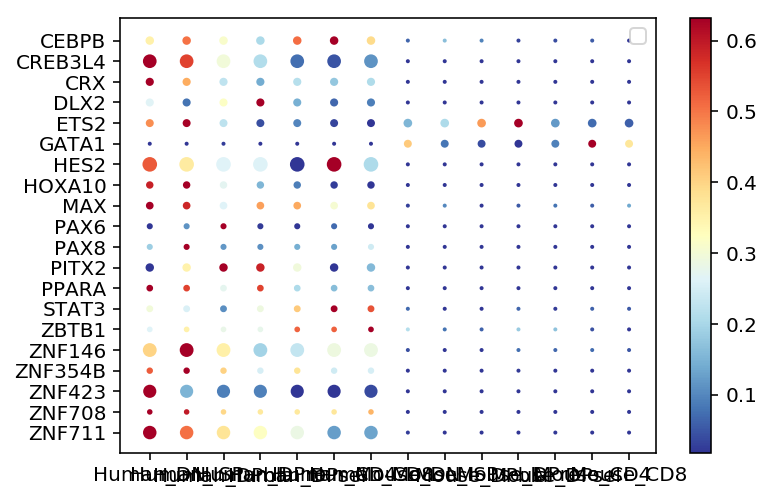

In [78]:
fig = plt.figure(figsize=(6,4))
order_cluster=merge_tf_expression.columns.tolist()
nk_terms=merge_tf_expression.index.tolist()
ax21 = plt.subplot(111)
for i in range(len(nk_terms)):
    g = ax21.scatter(x=range(1, len(order_cluster)+1), y=[i+1]*len(order_cluster), c=merge_tf_expression.iloc[-i-1,:].values,
                     cmap='RdYlBu_r', s=merge_tf_pvalue_all.iloc[-i-1,:]*1)
clb = plt.colorbar(g, fraction=0.15, ax=ax21,shrink=1)
ax21.legend()
addText = ax21.set_xticks(range(1, len(order_cluster)+1))
addText = ax21.set_xticklabels(order_cluster)
addText = ax21.set_yticks(range(1, len(nk_terms)+1))
sel_names_r = [' '.join(x.split('_')) for x in list(reversed(nk_terms))]  
addText = ax21.set_yticklabels(sel_names_r)

plt.show()

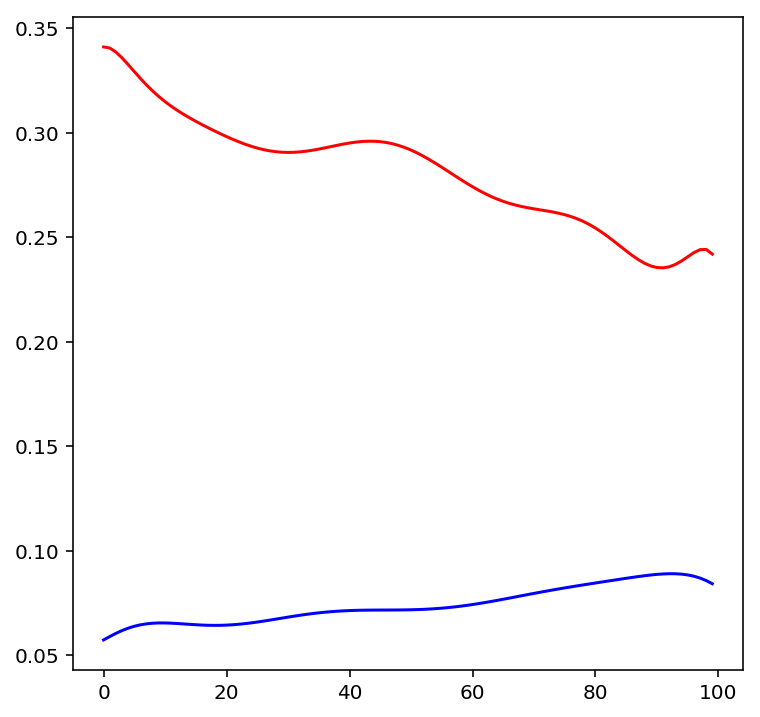

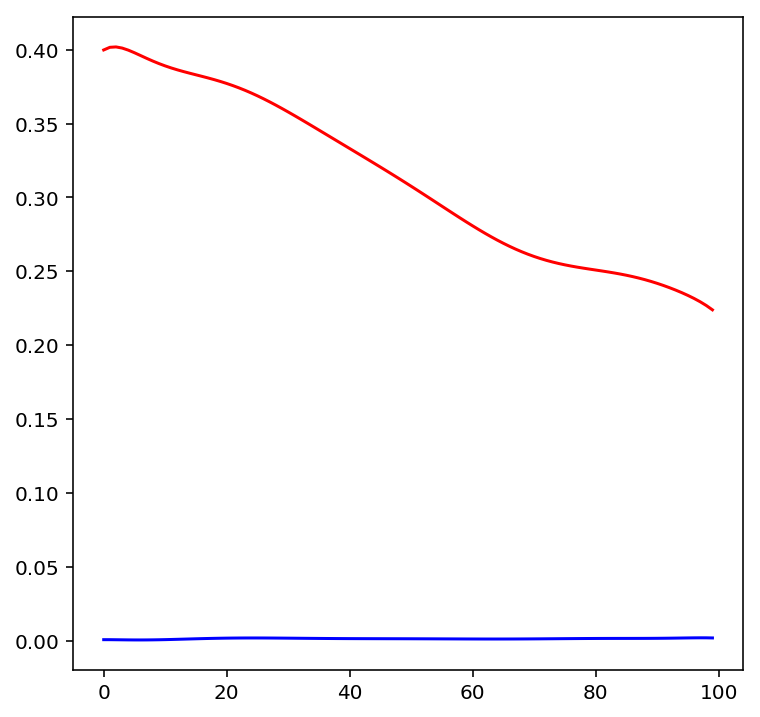

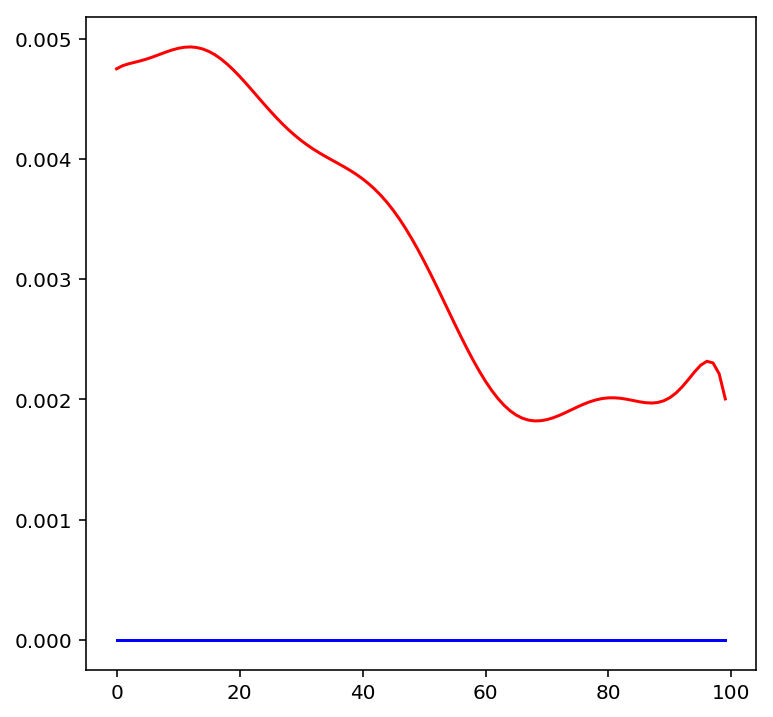

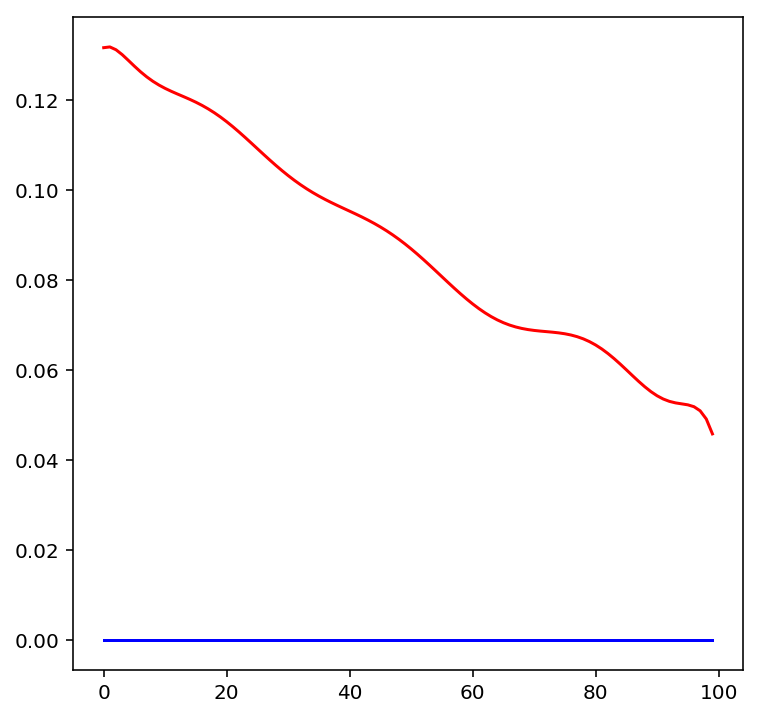

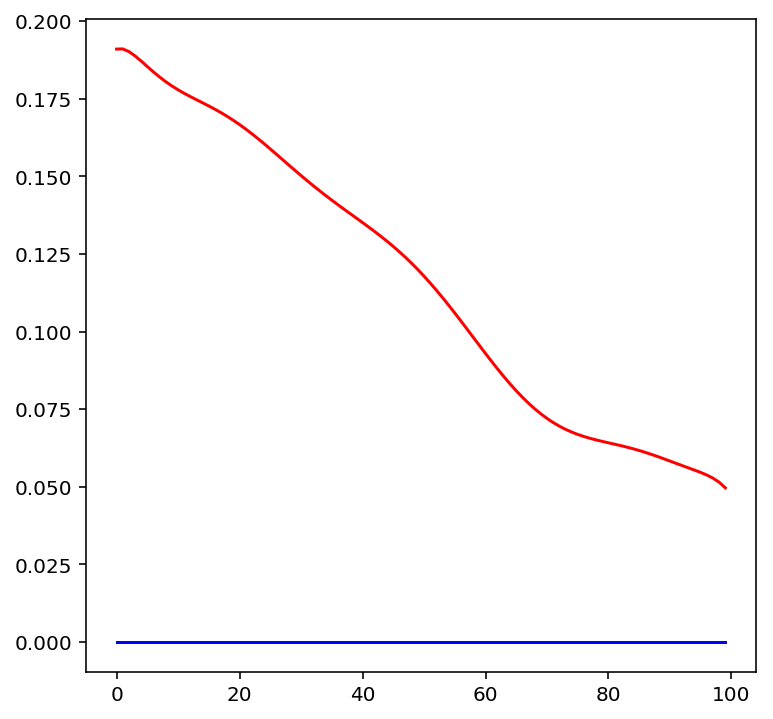

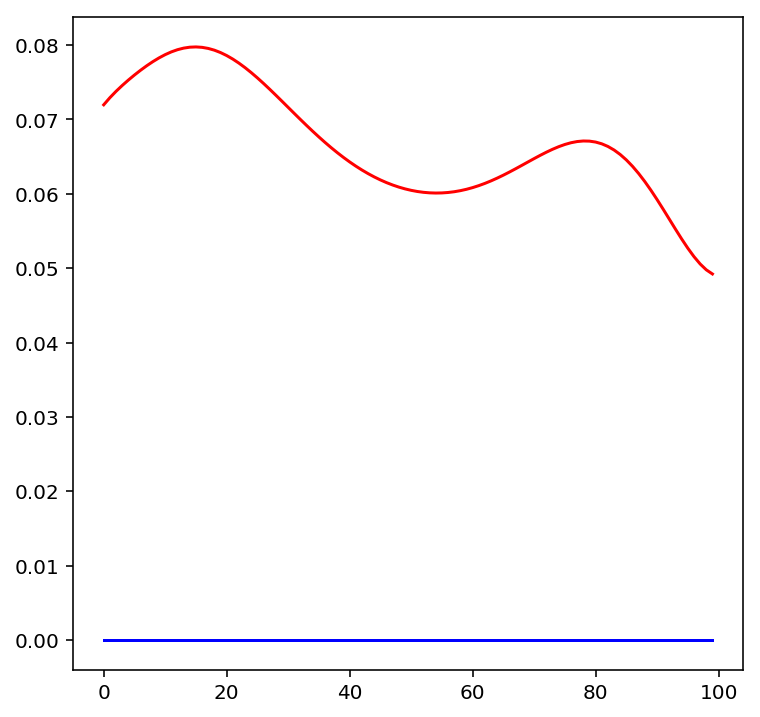

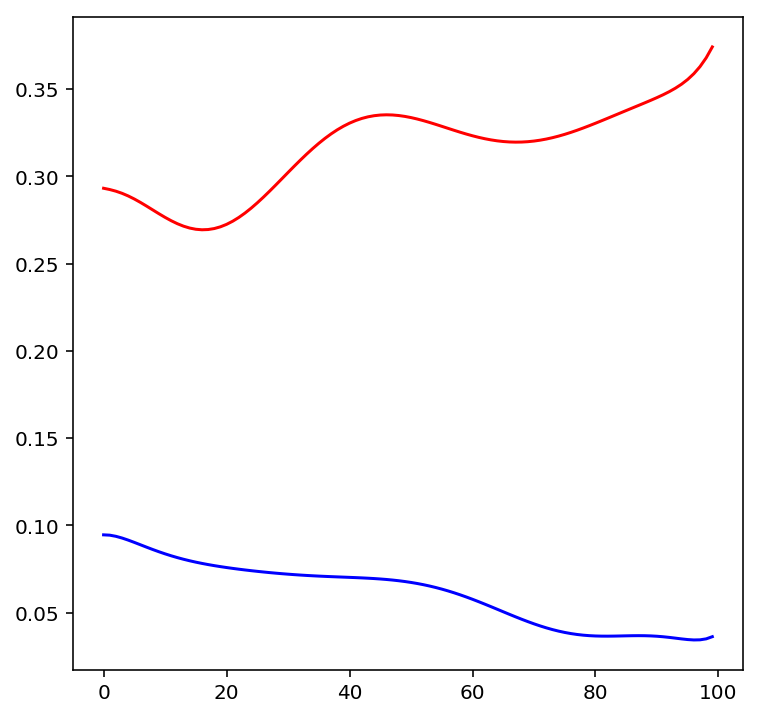

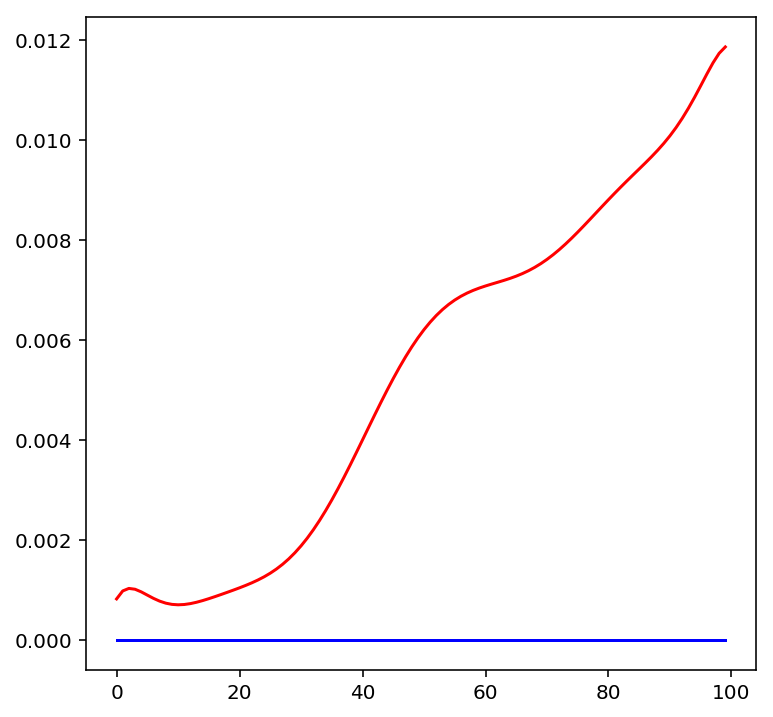

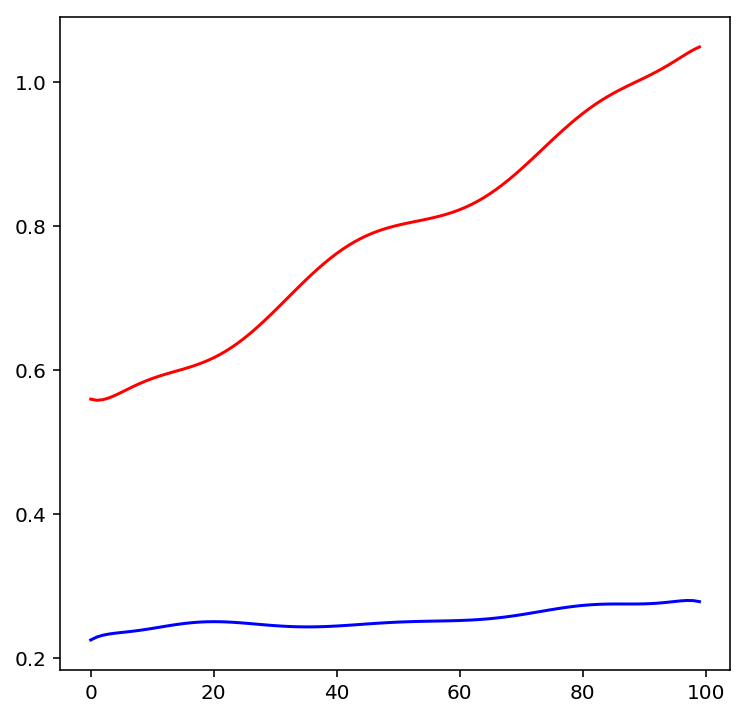

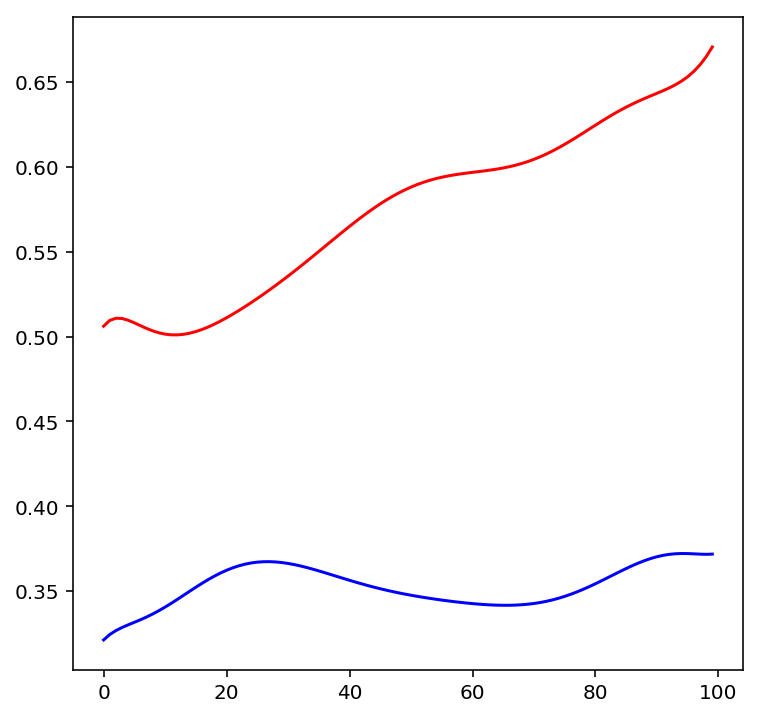

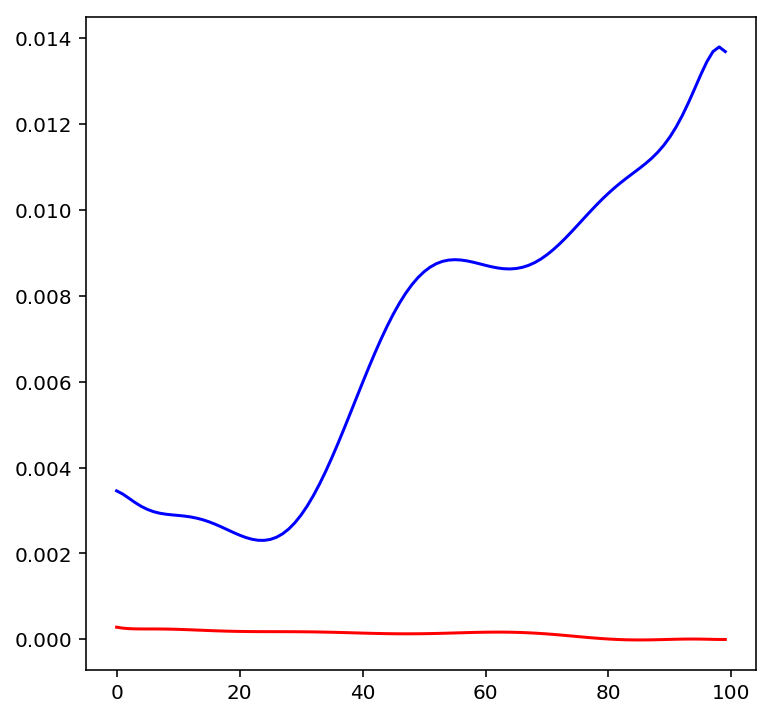

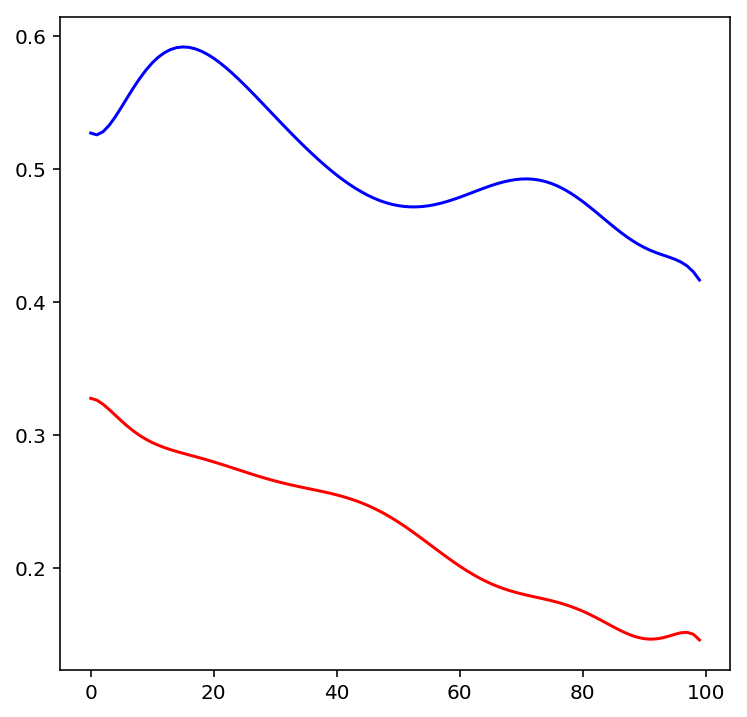

In [79]:
for i in ['ZNF146','ZNF711','ZNF423','CREB3L4','HOXA10','DLX2','CEBPB','CEBPE','STAT3','ZBTB1','GATA1','ETS2']:
    human_AEBP1=human_data_norm_homo_order_percent.ix[i]
    mouse_AEBP1=mouse_data_norm_homo_order_percent.ix[i]
    human_AEBP1=pd.DataFrame(human_AEBP1)
    mouse_AEBP1=pd.DataFrame(mouse_AEBP1)
    human_AEBP1=human_AEBP1.apply(lambda x:x.rolling(100,min_periods=1,center=True).mean())
    mouse_AEBP1=mouse_AEBP1.apply(lambda x:x.rolling(100,min_periods=1,center=True).mean())
    f1=np.polyfit(np.array(range(human_AEBP1.shape[0])),human_AEBP1.iloc[:,0].values,10)
    p1 = np.poly1d(f1)
    yvals1 = p1(range(human_AEBP1.shape[0]))

    f2=np.polyfit(np.array(range(mouse_AEBP1.shape[0])),mouse_AEBP1.iloc[:,0].values,10)
    p2 = np.poly1d(f2)
    yvals2 = p2(range(mouse_AEBP1.shape[0]))
    plt.figure(figsize=(6,6))
    plt.plot(range(human_AEBP1.shape[0]),yvals1,c='r')
    plt.plot(range(mouse_AEBP1.shape[0]),yvals2,c='b')
    #plt.savefig('../human_mouse/difference/known_{0}.pdf'.format(i),bbox_inches='tight')
    plt.show()

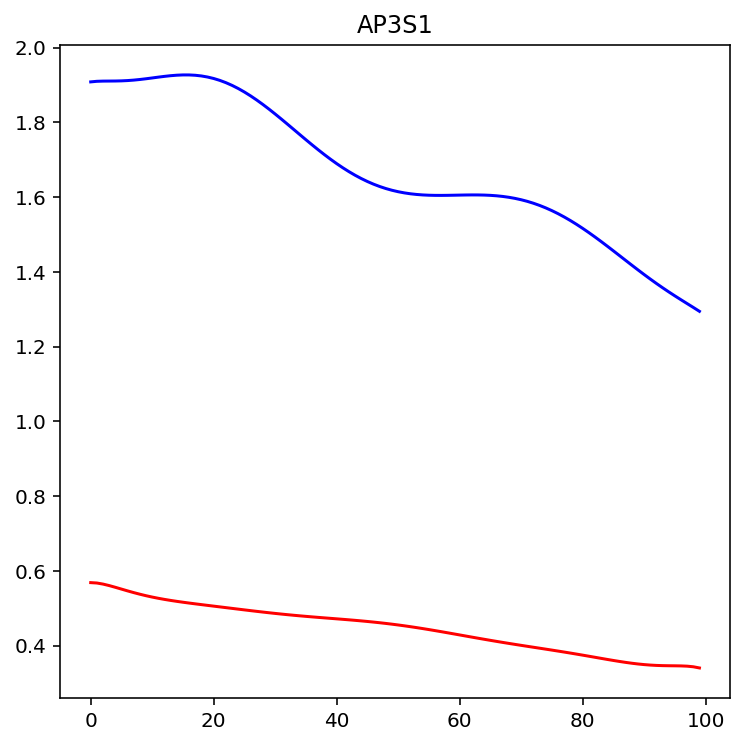

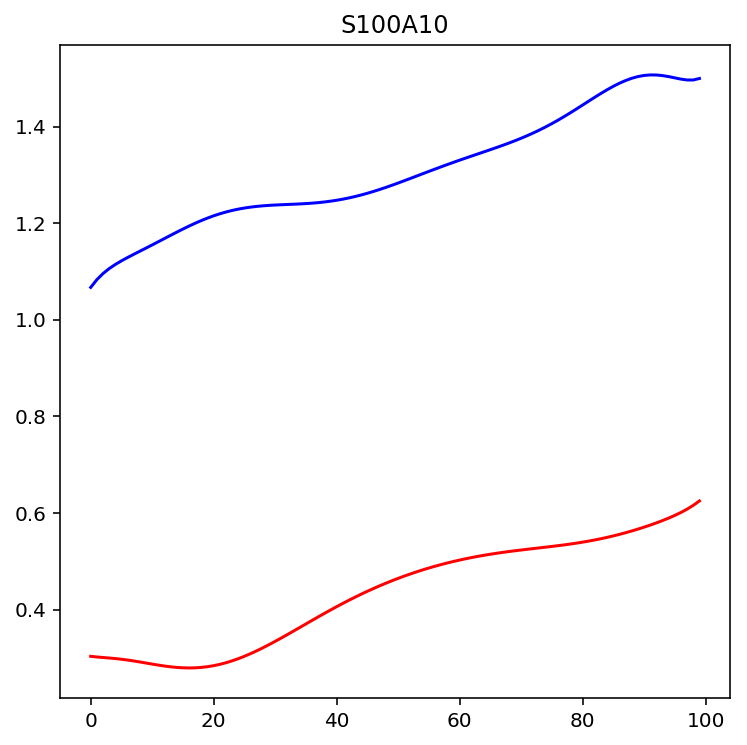

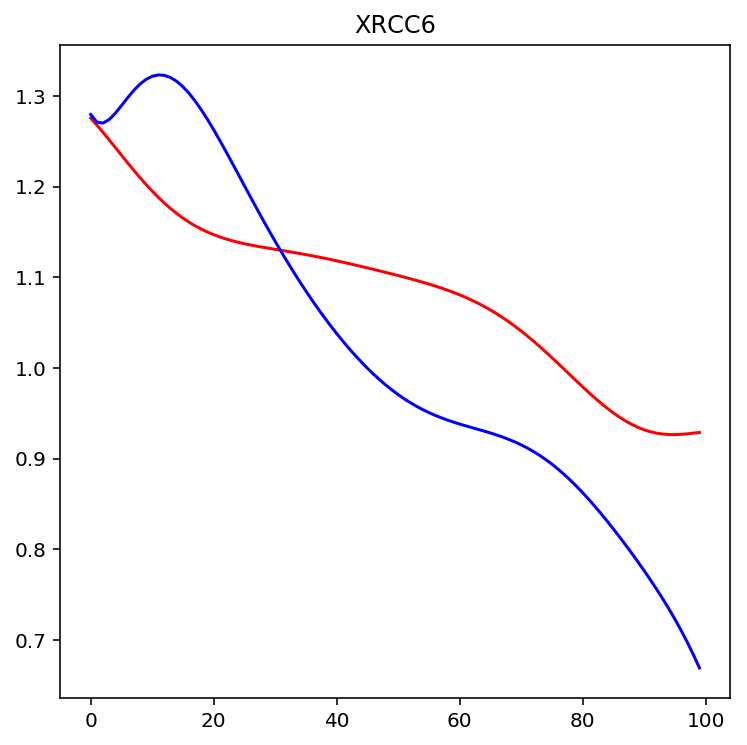

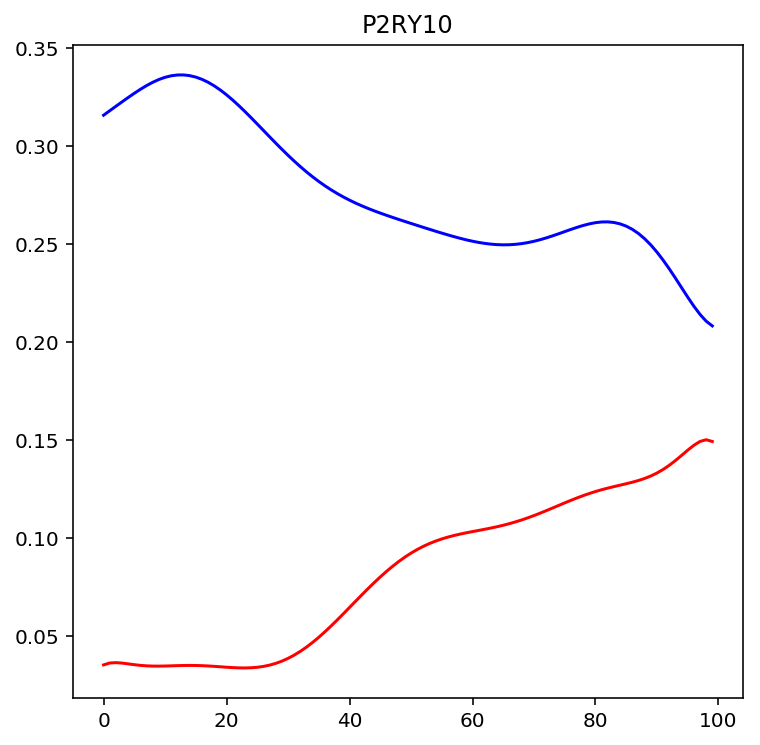

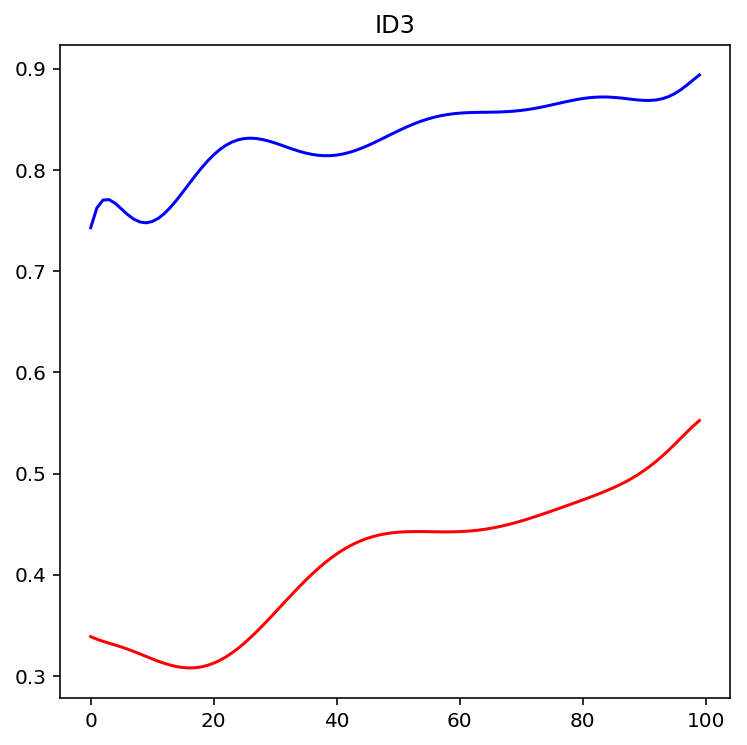

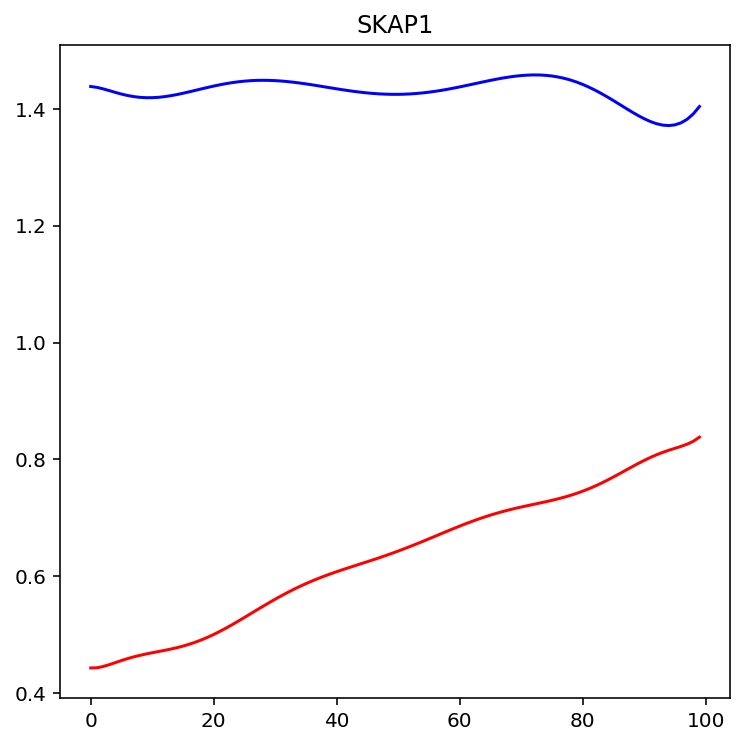

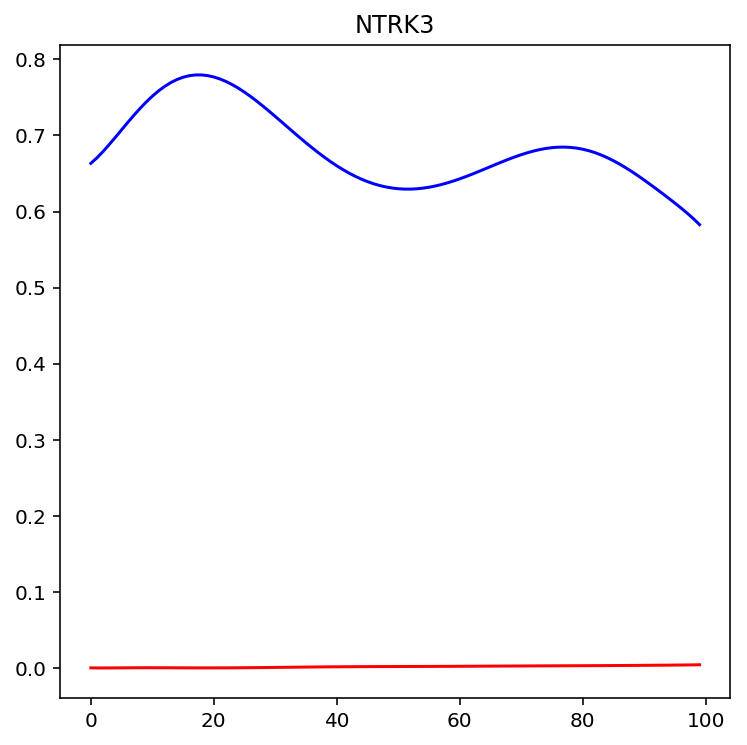

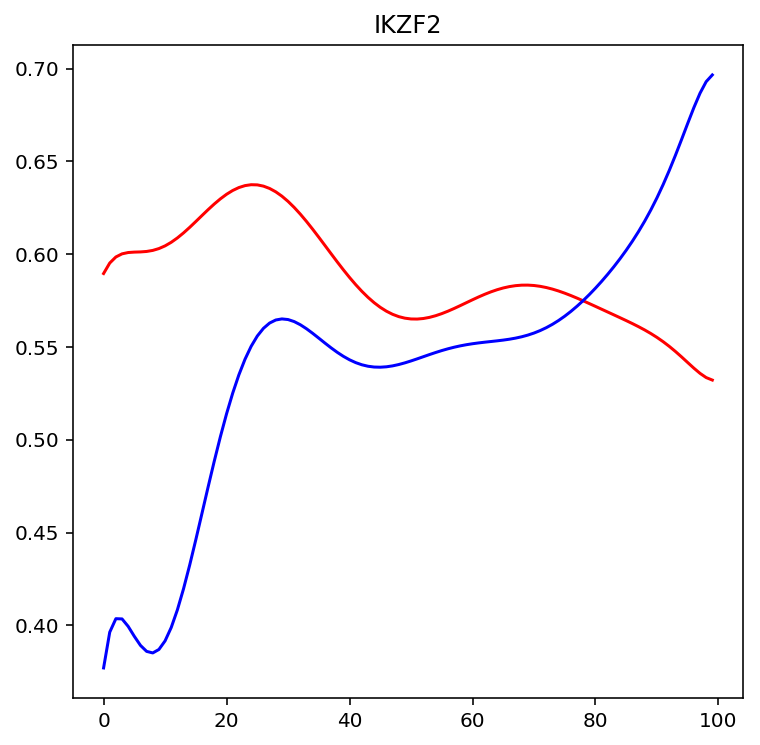

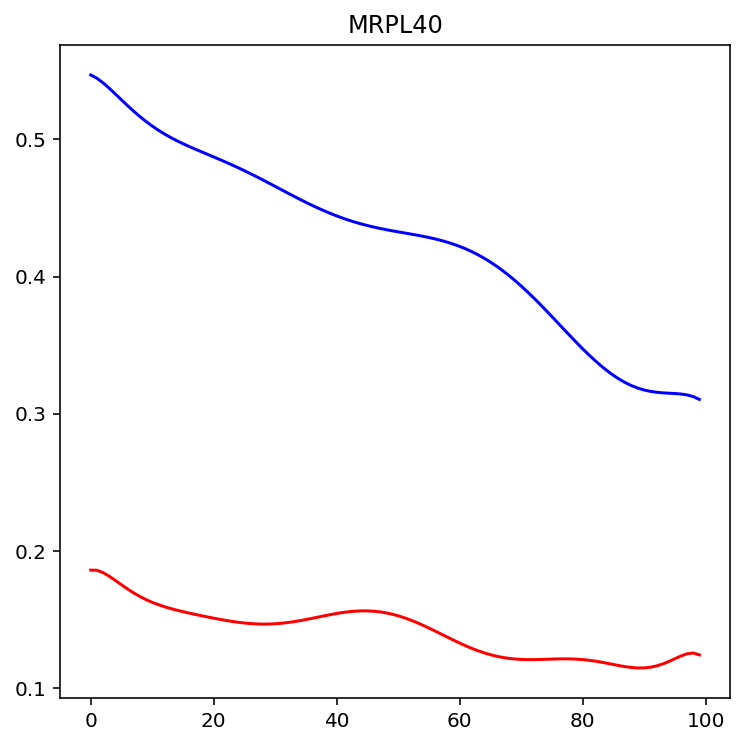

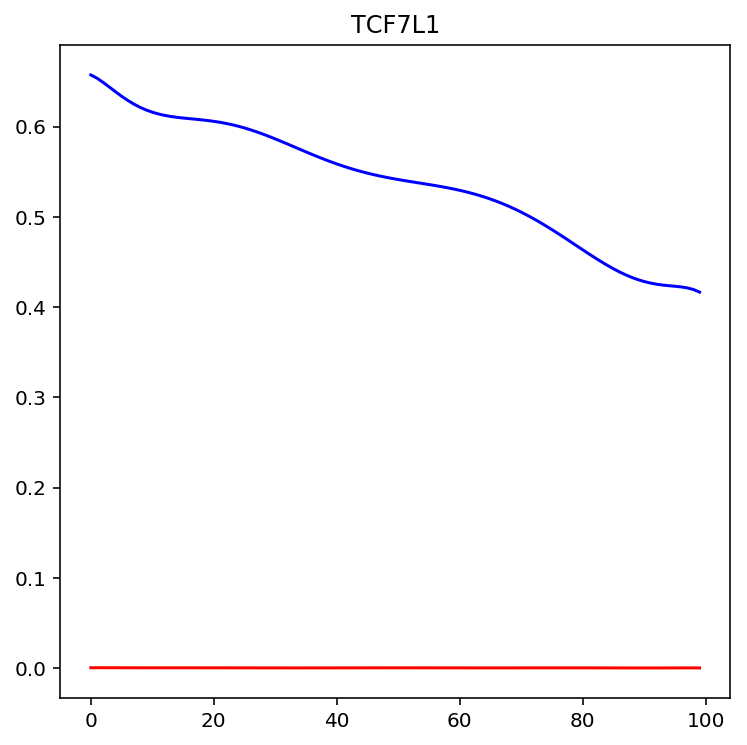

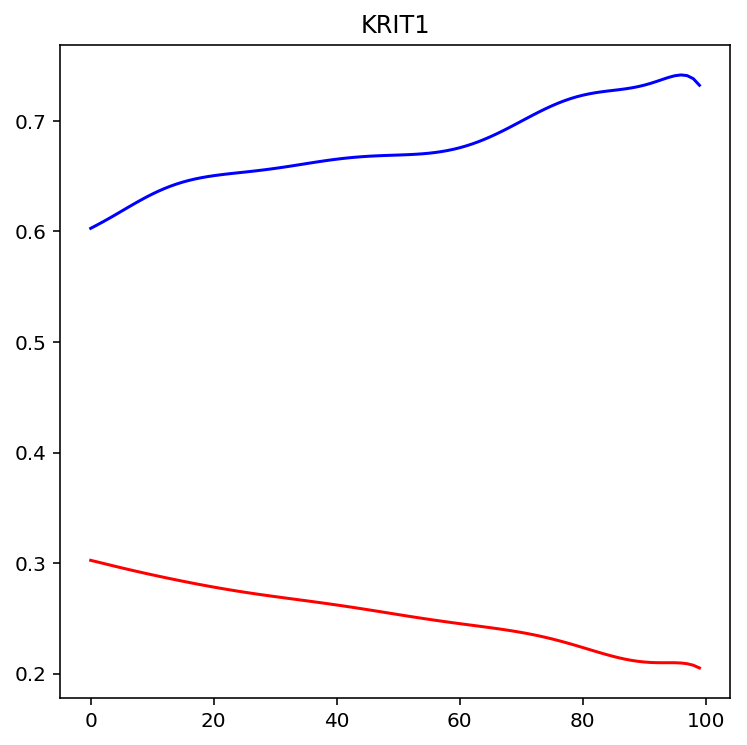

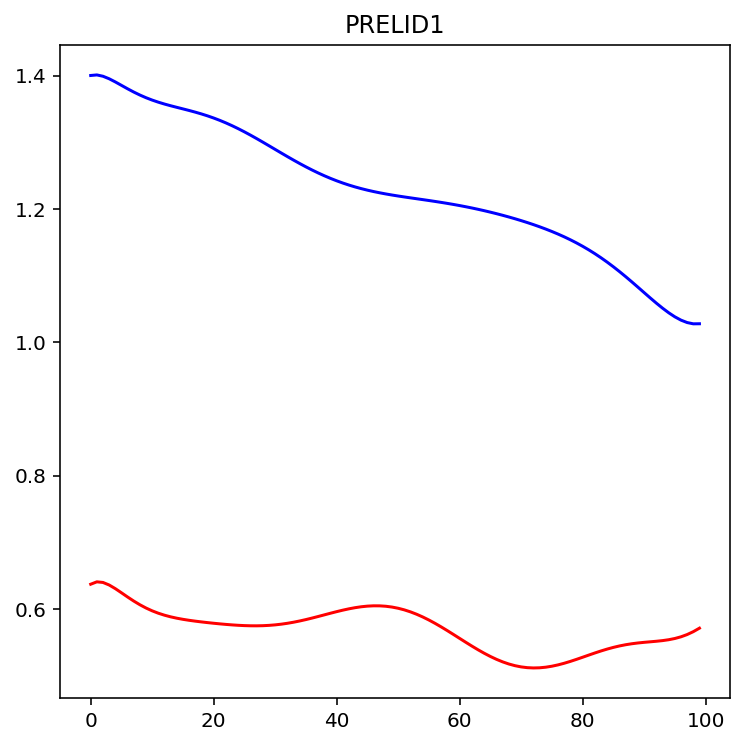

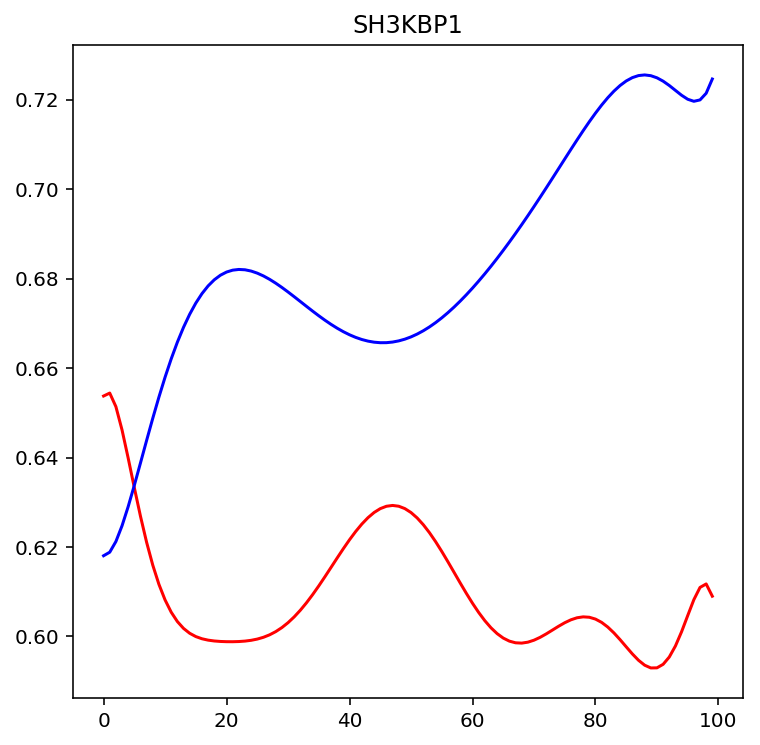

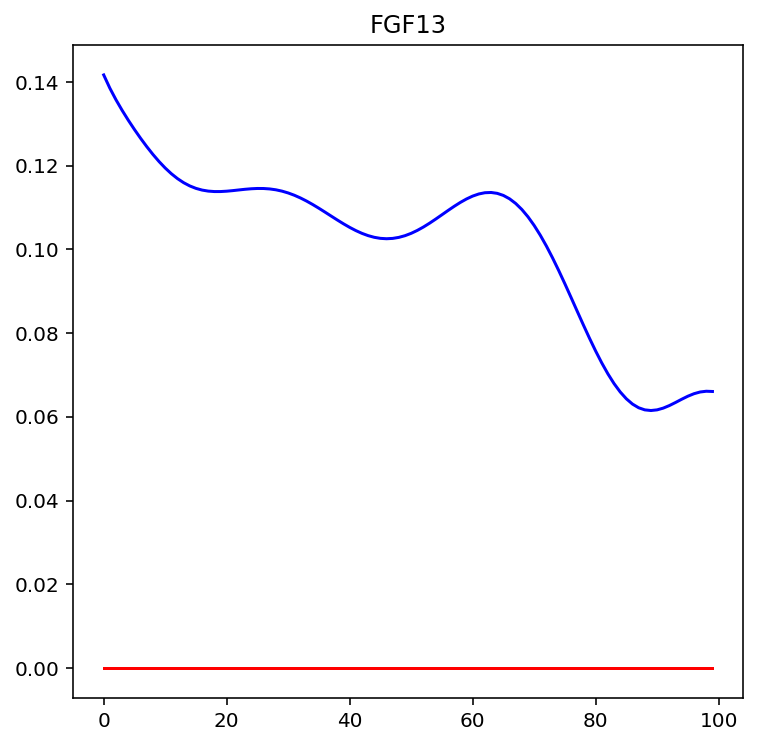

In [80]:
for i in ['AP3S1','S100A10','XRCC6','P2RY10','ID3','SKAP1','NTRK3','IKZF2','MRPL40','TCF7L1','KRIT1','PRELID1','SH3KBP1','FGF13']:
    human_AEBP1=human_data_norm_homo_order_percent.ix[i]
    mouse_AEBP1=mouse_data_norm_homo_order_percent.ix[i]
    human_AEBP1=pd.DataFrame(human_AEBP1)
    mouse_AEBP1=pd.DataFrame(mouse_AEBP1)
    human_AEBP1=human_AEBP1.apply(lambda x:x.rolling(100,min_periods=1,center=True).mean())
    mouse_AEBP1=mouse_AEBP1.apply(lambda x:x.rolling(100,min_periods=1,center=True).mean())
    f1=np.polyfit(np.array(range(human_AEBP1.shape[0])),human_AEBP1.iloc[:,0].values,10)
    p1 = np.poly1d(f1)
    yvals1 = p1(range(human_AEBP1.shape[0]))

    f2=np.polyfit(np.array(range(mouse_AEBP1.shape[0])),mouse_AEBP1.iloc[:,0].values,10)
    p2 = np.poly1d(f2)
    yvals2 = p2(range(mouse_AEBP1.shape[0]))
    plt.figure(figsize=(6,6))
    plt.title(i)
    plt.plot(range(human_AEBP1.shape[0]),yvals1,c='r')
    plt.plot(range(mouse_AEBP1.shape[0]),yvals2,c='b')
    #plt.savefig('../human_mouse/difference/marker/GATA1_{0}.pdf'.format(i),bbox_inches='tight')
    plt.show()